# **ANALYSIS OF CRIME AGAINST WOMEN FROM 2001 TO 2014**

# **DATASET**

**This data is collated from https://data.gov.in. It has state-wise and district level data on the various crimes committed against women between 2001 to 2014.**

**Crimes that are include are :**
* **'Rape'**
* **'Kidnapping and Abduction'**
* **'Dowry Deaths'**
* **'Assault on women with intent to outrage her modesty'**
* **'Insult to modesty of Women','Cruelty by Husband or his Relatives'**
* **'Importation of Girls'**

# **OVERVIEW**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df=pd.read_csv("/content/crimes_against_women_2001-2014.csv")
df.head()

Unnamed: 0        STATE/UT       DISTRICT  Year  Rape  \
0           0  ANDHRA PRADESH       ADILABAD  2001    50   
1           1  ANDHRA PRADESH      ANANTAPUR  2001    23   
2           2  ANDHRA PRADESH       CHITTOOR  2001    27   
3           3  ANDHRA PRADESH       CUDDAPAH  2001    20   
4           4  ANDHRA PRADESH  EAST GODAVARI  2001    23   

   Kidnapping and Abduction  Dowry Deaths  \
0                        30            16   
1                        30             7   
2                        34            14   
3                        20            17   
4                        26            12   

   Assault on women with intent to outrage her modesty  \
0                                                149     
1                                                118     
2                                                112     
3                                                126     
4                                                109     

   Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   
4                          58                                  247   

   Importation of Girls  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

**CHECKING NULL VALUES IF ANY**

In [105]:
#Dropping "Unnamed" Column
df=df.drop(['Unnamed: 0'],axis=1)

values_to_delete = ['total', 'total districts', 'total district(s)', 'zz total']
indices_to_drop = df[df['DISTRICT'].str.lower().isin(values_to_delete)].index

# Drop the rows
df = df.drop(indices_to_drop)

In [106]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [107]:
# Convert all state/UT names to lowercase
df['STATE/UT'] = df['STATE/UT'].str.lower()

# Replace inconsistent variations with standardized names
df['STATE/UT'] = df['STATE/UT'].replace({
    'a&n islands': 'a & n islands',
    'd&n haveli': 'd & n haveli',
    'delhi ut': 'delhi'
})
df['STATE/UT'].unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry', 'telangana'],
      dtype=object)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10198 entries, 0 to 10675
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             10198 non-null  object
 1   DISTRICT                                             10198 non-null  object
 2   Year                                                 10198 non-null  int64 
 3   Rape                                                 10198 non-null  int64 
 4   Kidnapping and Abduction                             10198 non-null  int64 
 5   Dowry Deaths                                         10198 non-null  int64 
 6   Assault on women with intent to outrage her modesty  10198 non-null  int64 
 7   Insult to modesty of Women                           10198 non-null  int64 
 8   Cruelty by Husband or his Relatives                  10198 non-null  int64 
 9   

In [109]:
df.describe()

Year          Rape  Kidnapping and Abduction  Dowry Deaths  \
count  10198.000000  10198.000000              10198.000000  10198.000000   
mean    2007.705432     30.986762                 38.120122     10.719945   
std        4.046667     38.652498                 70.763057     14.892719   
min     2001.000000      0.000000                  0.000000      0.000000   
25%     2004.000000      8.000000                  6.000000      1.000000   
50%     2008.000000     21.000000                 19.000000      5.000000   
75%     2011.000000     42.000000                 46.000000     15.000000   
max     2014.000000    706.000000               2160.000000    178.000000   

       Assault on women with intent to outrage her modesty  \
count                                       10198.000000     
mean                                           60.174838     
std                                            80.000399     
min                                             0.000000     
25%                                            10.000000     
50%                                            32.000000     
75%                                            79.000000     
max                                          1626.000000     

       Insult to modesty of Women  Cruelty by Husband or his Relatives  \
count                10198.000000                         10198.000000   
mean                    14.519023                           111.017356   
std                     44.507953                           198.214886   
min                      0.000000                             0.000000   
25%                      0.000000                            11.000000   
50%                      1.000000                            49.000000   
75%                     11.000000                           134.000000   
max                   1257.000000                          3504.000000   

       Importation of Girls  
count          10198.000000  
mean               0.091881  
std                1.322659  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max               60.000000

The ‘Year’ column can be ignored for now . For the others, we can see all the crimes in the data frame. The crimes of ‘Kidnapping and abduction’ (7910) and ‘Domestic violence’ (19865) have been reported mostly.

In [110]:
df['total_crimes'] = (
    df['Rape'] +
    df['Kidnapping and Abduction'] +
    df['Dowry Deaths'] +
    df['Assault on women with intent to outrage her modesty'] +
    df['Insult to modesty of Women'] +
    df['Cruelty by Husband or his Relatives'] +
    df['Importation of Girls']
)

In [111]:
crime_totals = {
    'Victims Raped': df['Rape'].sum(),
    'Victims Kidnapped/Abducted': df['Kidnapping and Abduction'].sum(),
    'Dowry Deaths': df['Dowry Deaths'].sum(),
    'Assault on Modesty': df['Assault on women with intent to outrage her modesty'].sum(),
    'Insult to Modesty': df['Insult to modesty of Women'].sum(),
    'Domestic Violence': df['Cruelty by Husband or his Relatives'].sum(),
    'Girls Imported': df['Importation of Girls'].sum()
}

crime_totals

{'Victims Raped': 316003,
 'Victims Kidnapped/Abducted': 388749,
 'Dowry Deaths': 109322,
 'Assault on Modesty': 613663,
 'Insult to Modesty': 148065,
 'Domestic Violence': 1132155,
 'Girls Imported': 937}

In [112]:
total_cases = sum(crime_totals.values())
print(f'Total Cases: {total_cases}')

Total Cases: 2708894


The total reported crimes amount to 2,708,894. This highlights a severe issue in our society, almost 3 million women in India were victims of assault, domestic violence, rape, or dowry death between 2001 and 2014.

In [113]:
def with_hue(data,feature,ax):

    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])

    bars=ax.patches

    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat]
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=10)



def without_hue(data,feature,ax):

    total=float(len(data))
    bars_plot=ax.patches

    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y+2,y,ha='center',fontweight='bold',fontsize=7)


# **YEAR BY YEAR ANALYSIS**

In [114]:
# List of crime categories including total crimes
crimes = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls',
    'total_crimes'
]

# Create an empty DataFrame
df1 = pd.DataFrame()

# Group by 'Year' and sum the values for each crime category
for i in crimes:
    df_crimes = df.groupby(['Year'])[i].sum()
    df1[i] = df_crimes

print("Total number of crimes from 2001 to 2014")
df1

Total number of crimes from 2001 to 2014


Rape  Kidnapping and Abduction  Dowry Deaths  \
Year                                                  
2001  16456                     15609          6964   
2002  16776                     15399          6957   
2003  16337                     14093          6338   
2004  18784                     16459          7152   
2005  19017                     16856          6901   
2006  19971                     18480          7755   
2007  21335                     21583          8231   
2008  21933                     24075          8301   
2009  21866                     27396          8524   
2010  22679                     31535          8534   
2011  24778                     37650          8760   
2012  25629                     40422          8367   
2013  33707                     51881          8083   
2014  36735                     57311          8455   

      Assault on women with intent to outrage her modesty  \
Year                                                        
2001                                              34626     
2002                                              34389     
2003                                              33428     
2004                                              35168     
2005                                              34937     
2006                                              37335     
2007                                              39602     
2008                                              41024     
2009                                              39263     
2010                                              41214     
2011                                              43625     
2012                                              46078     
2013                                              70739     
2014                                              82235     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
Year                                                                    
2001                        9836                                49308   
2002                       10283                                49372   
2003                       12430                                51914   
2004                       10131                                59375   
2005                       10209                                59643   
2006                       10110                                64856   
2007                       11117                                77717   
2008                       12344                                82731   
2009                       11127                                90829   
2010                       10041                                95445   
2011                        8732                               100710   
2012                        9381                               108512   
2013                       12589                               118866   
2014                        9735                               122877   

      Importation of Girls  total_crimes  
Year                                      
2001                   114        132913  
2002                    76        133252  
2003                    46        134586  
2004                    89        147158  
2005                   150        147713  
2006                    67        158574  
2007                    61        179646  
2008                    67        190475  
2009                    48        199053  
2010                    36        209484  
2011                    80        224335  
2012                    59        238448  
2013                    31        295896  
2014                    13        317361

<ipython-input-115-ad5a3d7186fe>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=df1,x=arr,y='total_crimes',palette='rocket_r')
<ipython-input-115-ad5a3d7186fe>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


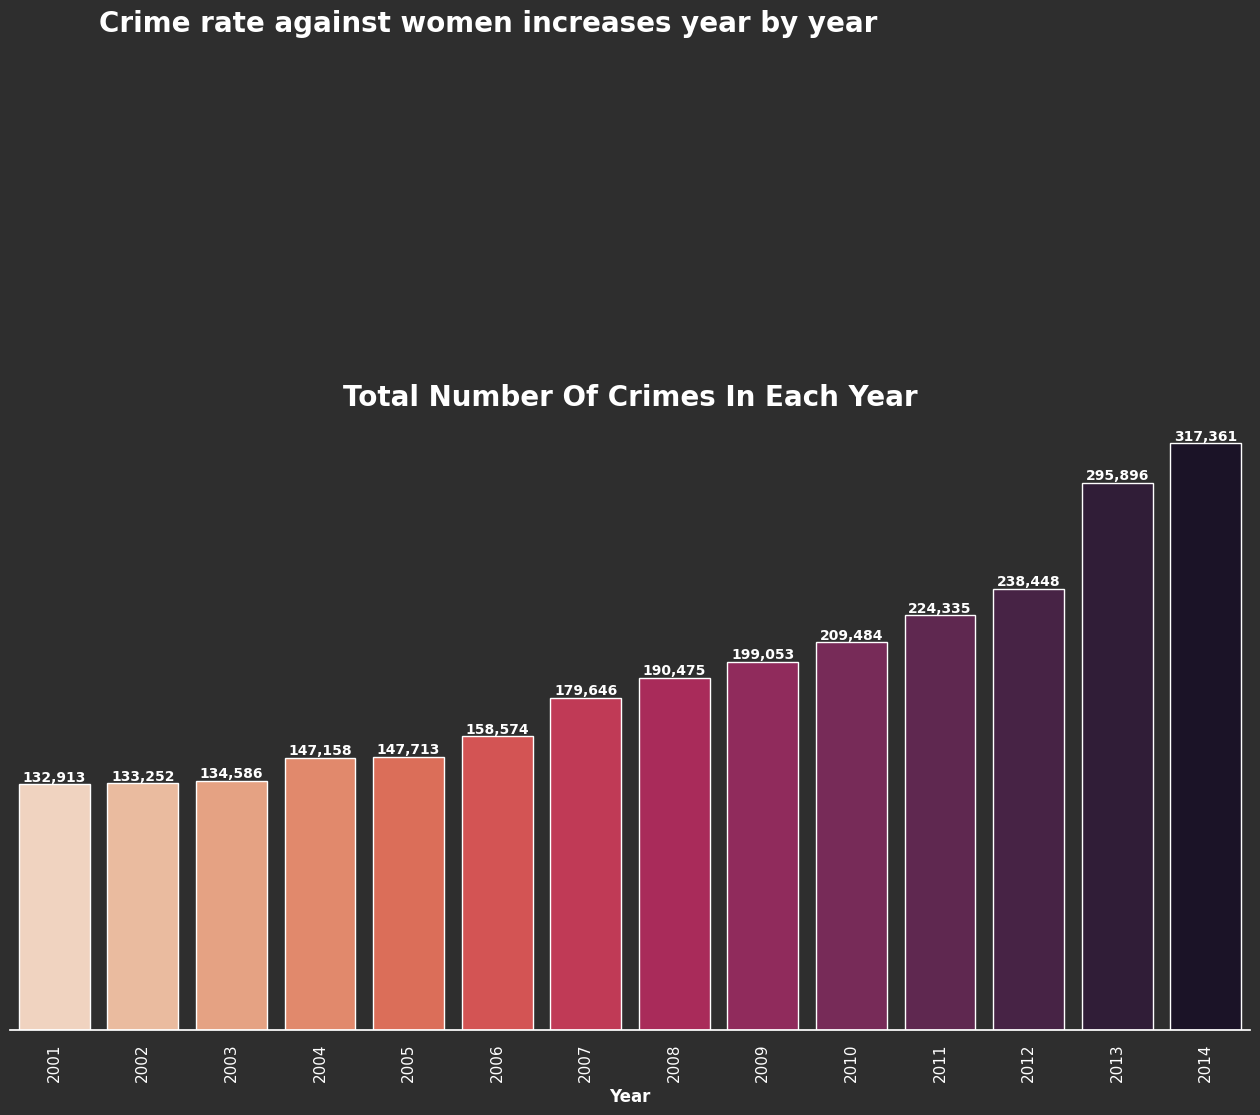

In [115]:
sns.set_theme(style='dark',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

lower_year=2001
upper_year=2014
arr=[]
for i in range(lower_year,upper_year+1):
    arr.append(i)
arr=np.array(arr)

a=sns.barplot(data=df1,x=arr,y='total_crimes',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel("Year",fontweight='bold',color='white')
plt.ylabel("")
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20,color='white')

# Hide y-axis
ax.yaxis.set_visible(False)

# Add labels over each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format the label as integer with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the label in the middle of the bar
                ha='center', va='center',  # Center horizontally and vertically
                xytext=(0, 5),  # Add a small vertical offset to avoid overlap
                textcoords='offset points',
                color='white', fontsize=10, fontweight='bold')


plt.show()

How each crime varies year by year


<ipython-input-116-02a027e8a644>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x=df1.index, y=col, palette='rocket', ax=ax[i][j])
<ipython-input-116-02a027e8a644>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x=df1.index, y=col, palette='rocket', ax=ax[i][j])
<ipython-input-116-02a027e8a644>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x=df1.index, y=col, palette='rocket', ax=ax[i][j])
<ipython-input-116-02a027e8a644>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

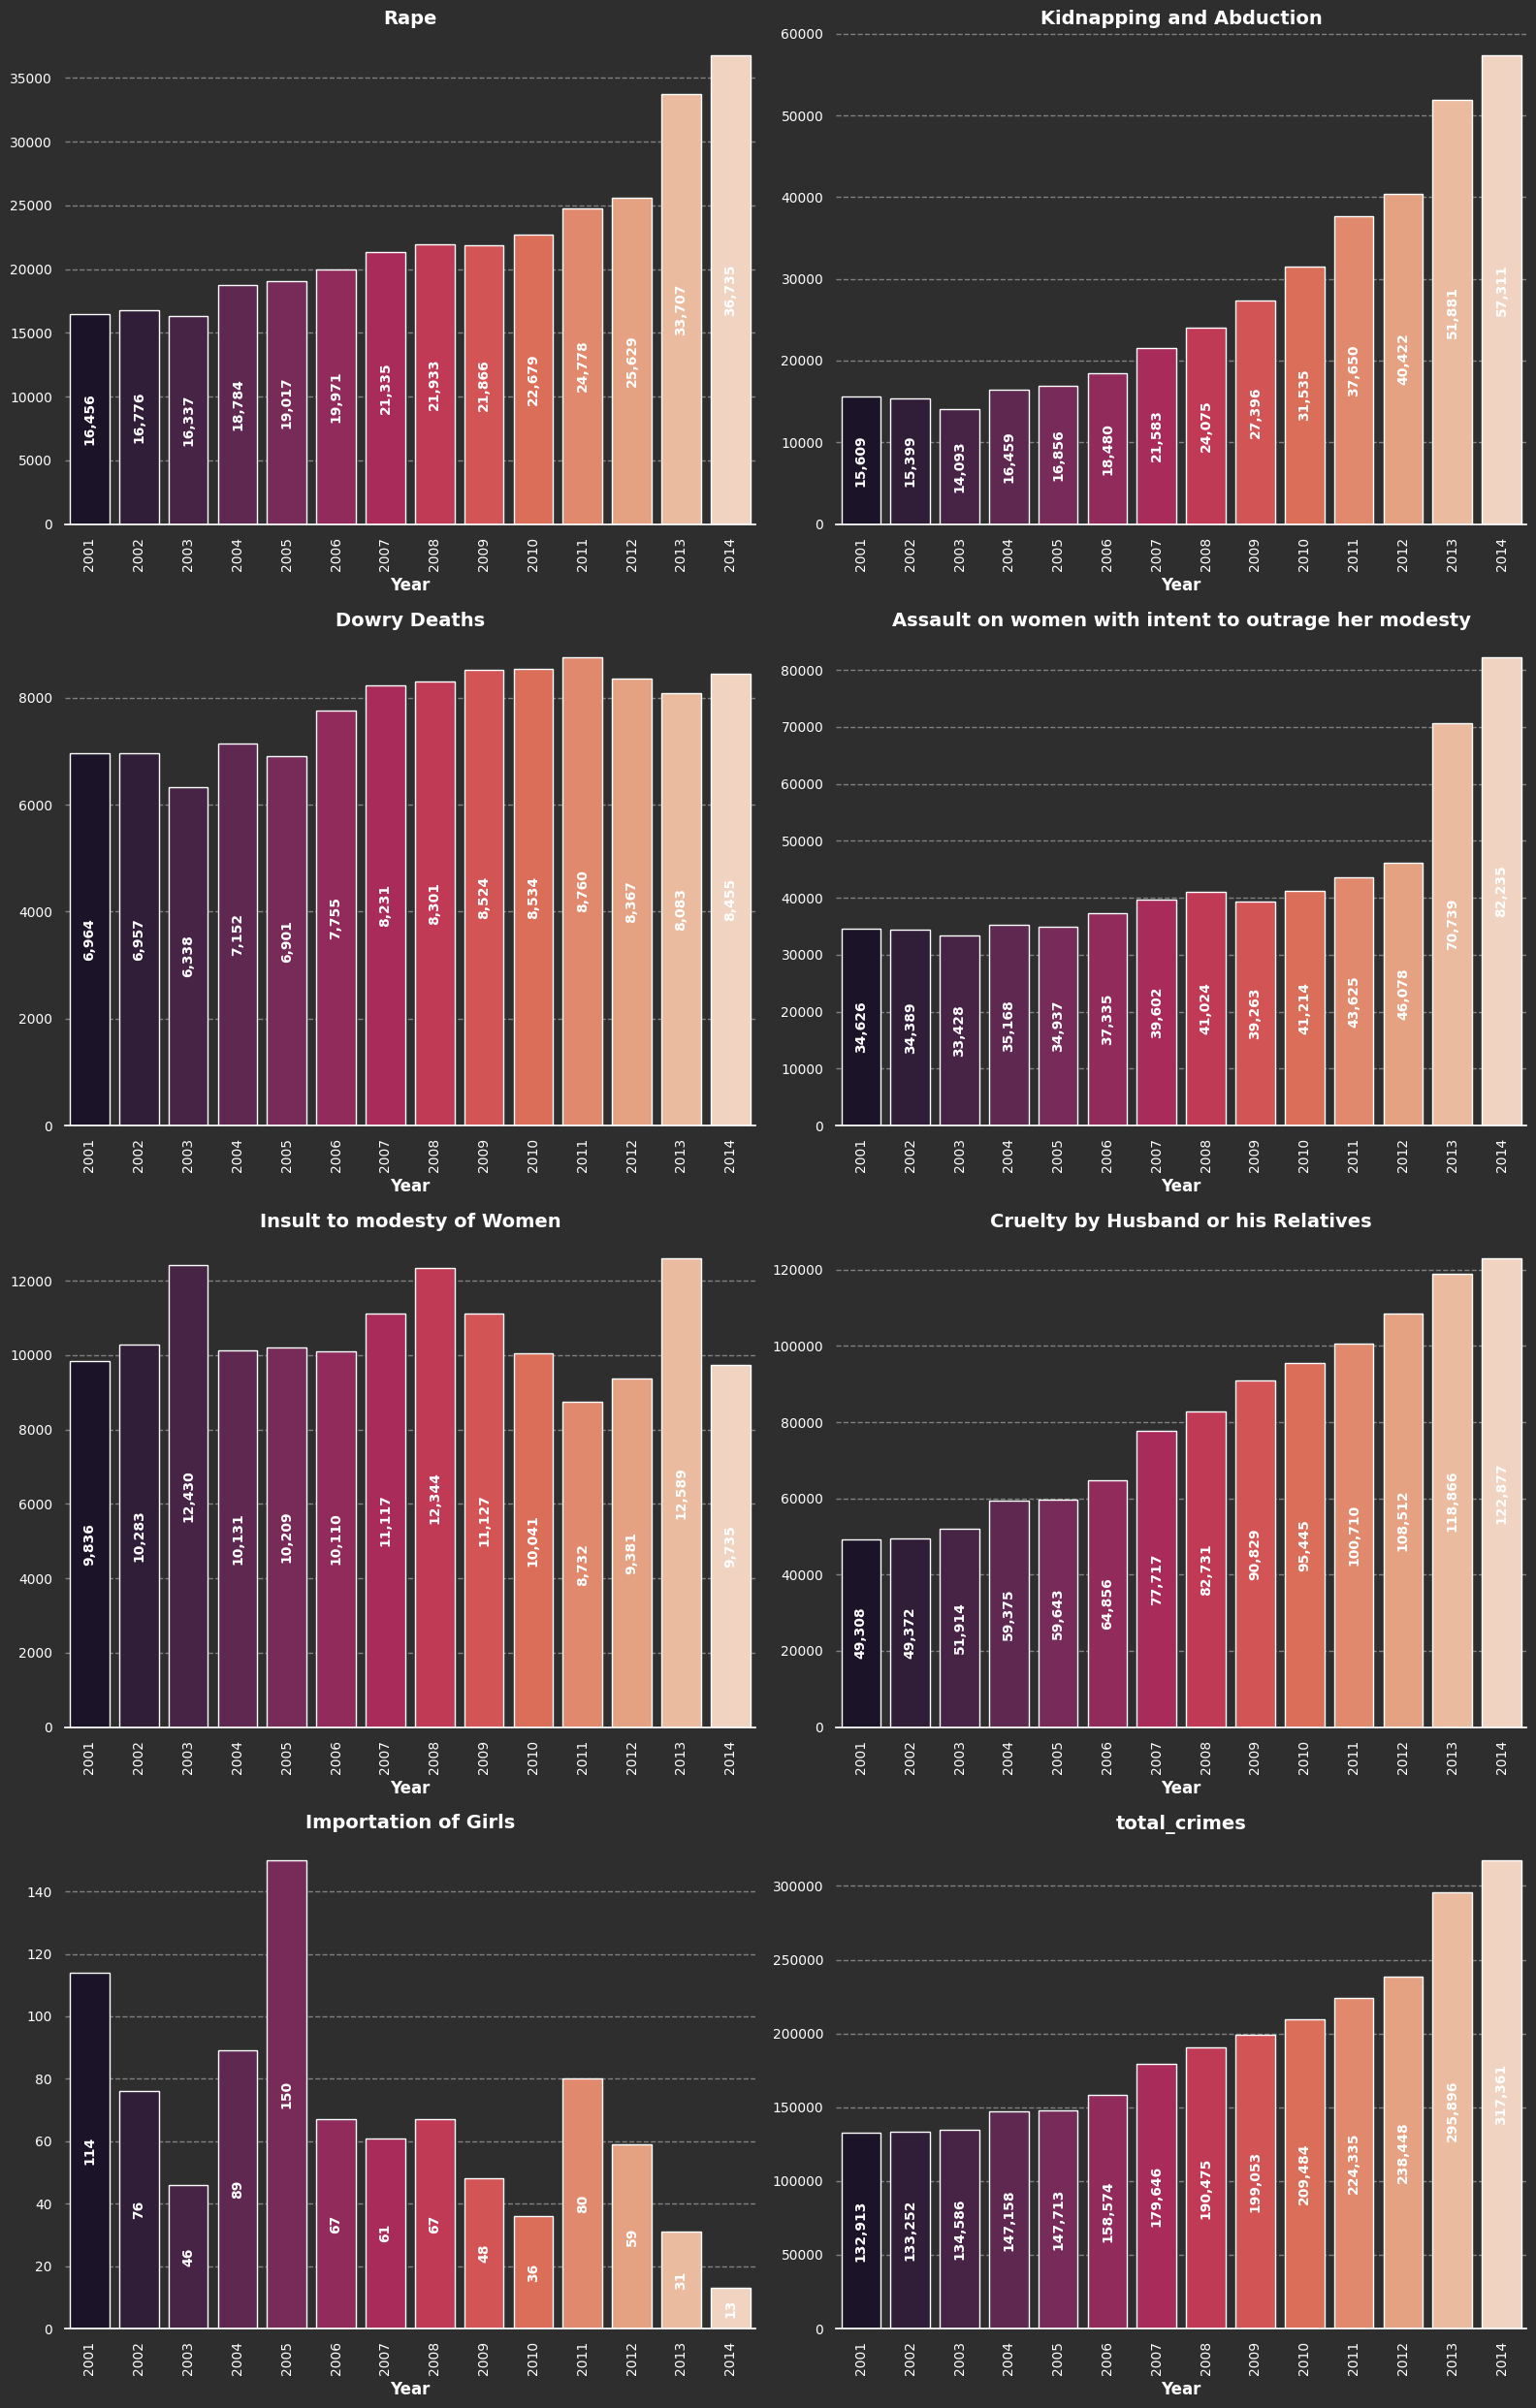

In [116]:
def plotting_cat_features(nrows, ncols, cat_columns):

    f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 25))
    f.patch.set_facecolor('#2E2E2E')

    # Setting background and foreground color
    for i in range(0, nrows):
        for j in range(0, ncols):
            ax[i][j].set_facecolor('#2E2E2E')

    # Plotting bar plots for categorical features
    for i in range(0, nrows):
        for j in range(0, ncols):
            index = i * ncols + j
            if index >= len(cat_columns):
                ax[i][j].axis('off')  # Hide unused subplots
                continue

            col = cat_columns[index]
            sns.barplot(data=df1, x=df1.index, y=col, palette='rocket', ax=ax[i][j])

            # Customize plot appearance
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['left'].set_visible(False)
            ax[i][j].grid(linestyle="--", axis='y', color='gray')

            # Make axis tick labels visible with a contrasting color
            ax[i][j].tick_params(axis='x', colors='white', labelrotation=90, labelsize=10)
            ax[i][j].tick_params(axis='y', colors='white', labelsize=10)

            # Set axis labels (no label for y-axis)
            ax[i][j].set_xlabel("Year", fontsize=12, fontweight='bold', color='white')
            ax[i][j].set_ylabel("")  # Remove y-axis label

            # Set the column name as the plot title
            ax[i][j].set_title(f'{col}', fontsize=14, fontweight='bold', color='white')

            # Add vertical labels inside each bar
            for p in ax[i][j].patches:
                height = p.get_height()
                ax[i][j].annotate(f'{height:,.0f}',
                                  (p.get_x() + p.get_width() / 2., height / 2.),
                                  ha='center', va='center',
                                  xytext=(0, 0),
                                  textcoords='offset points',
                                  color='white', fontsize=10, fontweight='bold',
                                  rotation=90)

    plt.tight_layout()
    plt.show()

# Example usage
print("How each crime varies year by year")
plotting_cat_features(4, 2, crimes)

## **CRIME RATE INCREMENT YEAR BY YEAR**

<ipython-input-117-c2c1ba3fbd27>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


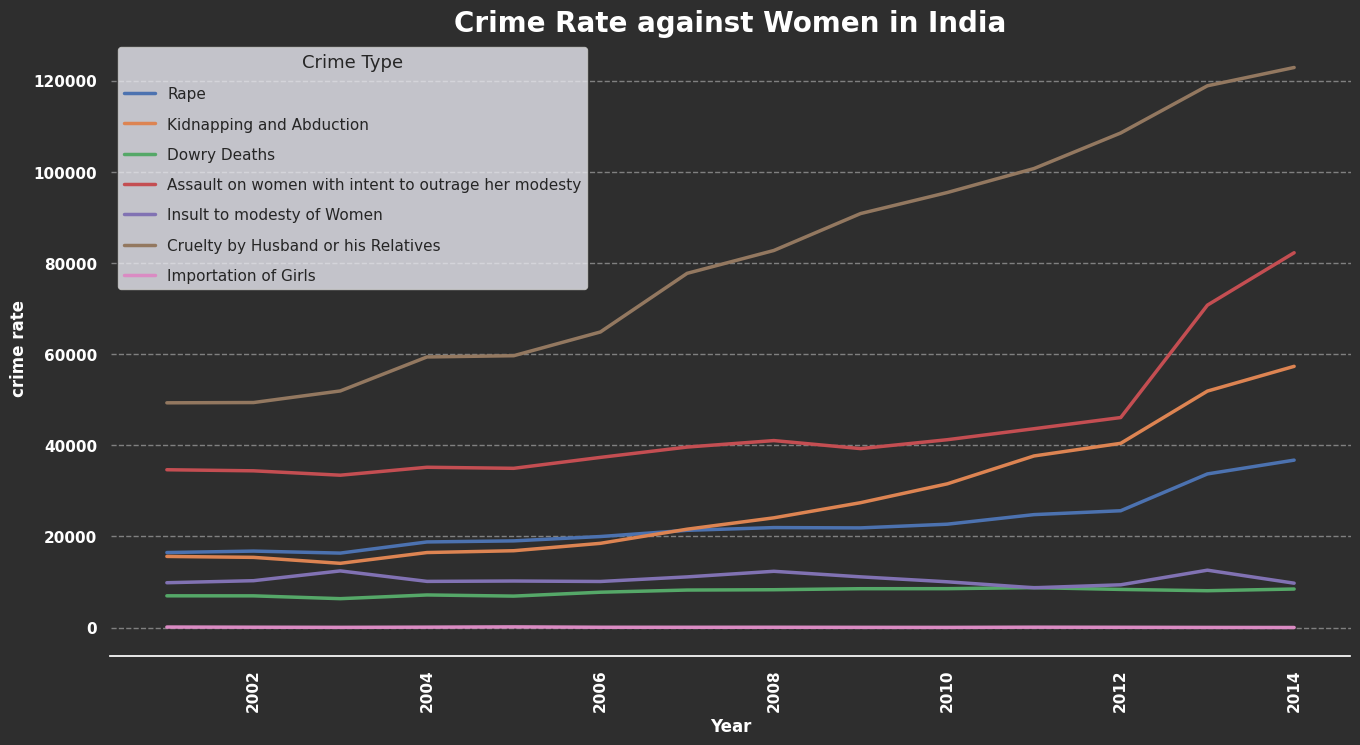

In [117]:
sns.set_theme(style='dark', context='notebook')

fig = plt.figure(figsize=(16, 8))

ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--", axis="y", color='gray')

lower_year = 2001
upper_year = 2014
arr = np.arange(lower_year, upper_year + 1)

# Line plot with a plain line style
for crime in crimes[:-1]:
    a = sns.lineplot(x='Year',y=crime,data=df1, label=crime, linewidth=2.5, linestyle='solid')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set axis and tick labels to white
plt.xticks(fontweight='bold', color='white')
plt.yticks(fontweight='bold', color='white')
plt.xlabel("Year", fontweight='bold', color='white')
plt.ylabel("crime rate", fontweight='bold', color='white')
plt.title("Crime Rate against Women in India", fontweight='bold', fontsize=20, color='white')

plt.legend(title='Crime Type', title_fontsize='13',fontsize='11',loc='upper left',frameon = True, labelspacing = 1)

plt.show()

### **TOTAL NUMBER  OF EACH CATEGORY CRIME 2001 TO 2014**

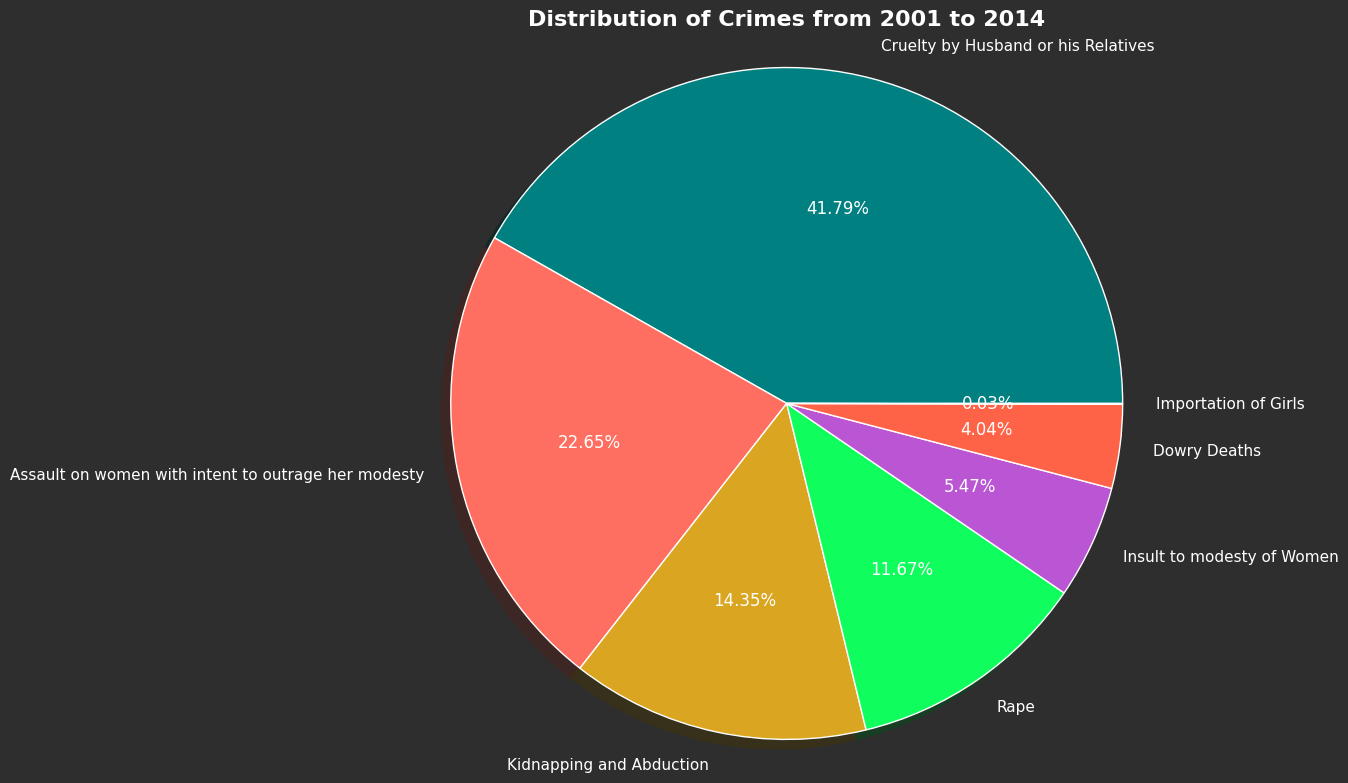

In [118]:

# List of crimes
crimes = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls'
]

# Create a list of dictionaries with crime and total counts
data = []
for crime in crimes:
    total = df[crime].sum()
    data.append({'crimes': crime, 'total': total})

# Create DataFrame from the list of dictionaries
df_top_crimes = pd.DataFrame(data)

# Sort the DataFrame by total count in descending order
df_top_crimes = df_top_crimes.sort_values(by='total', ascending=False).reset_index(drop=True)

# Convert to lists for plotting
list_crimes_number = df_top_crimes['total'].tolist()
list_crimes = df_top_crimes['crimes'].tolist()

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

colors = ['#008080', '#FF6F61', '#DAA520', '#0ffe5e', '#BA55D3', '#FF6347', '#20B2AA']

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    list_crimes_number,
    colors=colors,
    labels=list_crimes,
    autopct='%1.2f%%',
    shadow=True
)

# Customize text colors
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

# Set plot title in white
plt.title("Distribution of Crimes from 2001 to 2014", fontweight='bold', fontsize=16, color='white')

plt.axis('equal')
plt.tight_layout()
plt.show()

<ipython-input-119-4845bc48f560>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(data=df_top_crimes, y='total', x='crimes', palette='rocket', ax=ax)
<ipython-input-119-4845bc48f560>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


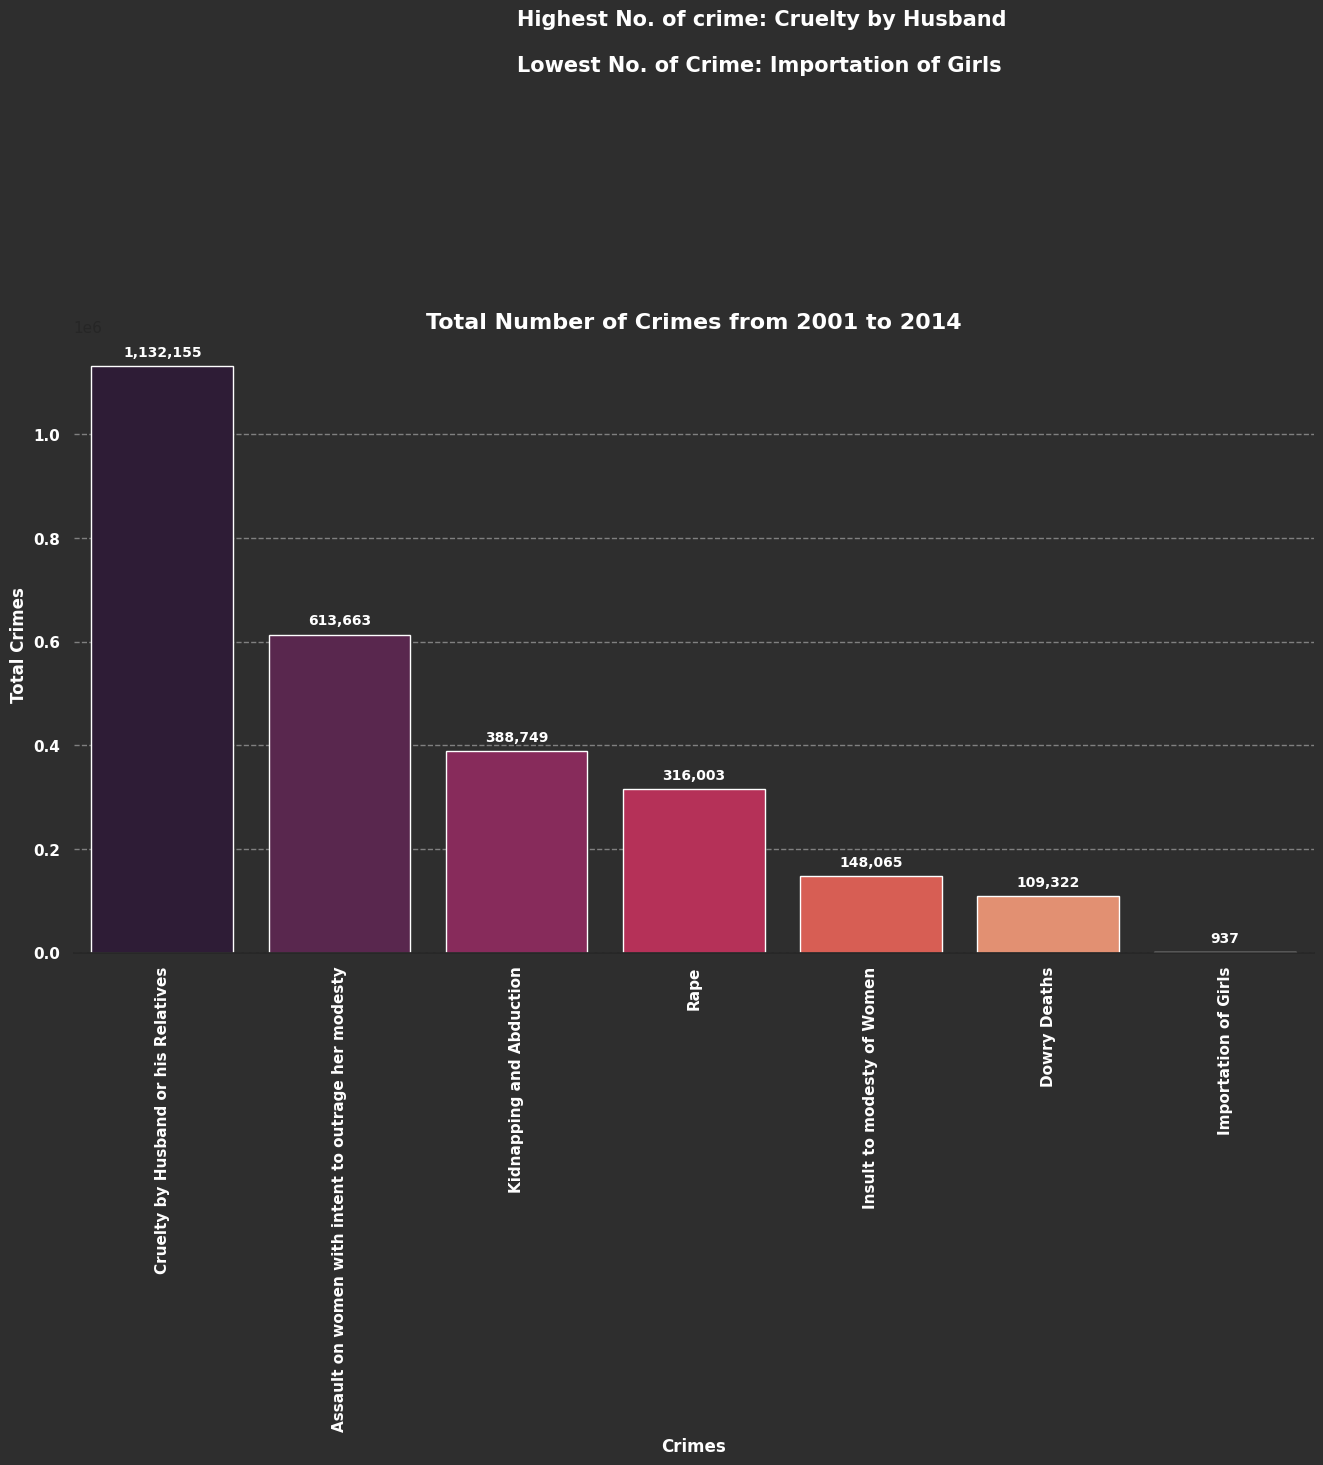

In [119]:
sns.set_theme(style='white', context='notebook')

fig = plt.figure(figsize=(16, 8))

ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--", axis="y", color='gray')

a = sns.barplot(data=df_top_crimes, y='total', x='crimes', palette='rocket', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Make axis labels and ticks visible in white
plt.xticks(fontweight='bold', color='white')
plt.yticks(fontweight='bold', color='white')
plt.xlabel("Crimes", fontweight='bold', color='white')
plt.ylabel("Total Crimes", fontweight='bold', color='white')

# Set plot title and plot text in white
plt.title("Total Number of Crimes from 2001 to 2014", fontweight='bold', fontsize=16, color='white')
plt.text(2, 1700000, "Highest No. of crime: Cruelty by Husband\n\nLowest No. of Crime: Importation of Girls",
         fontweight='bold', fontsize=15, color='white')

# Add bar values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                color='white', fontsize=10, fontweight='bold')

plt.show()


### **COMPARISON BETWEEN 2001 AND 2014**

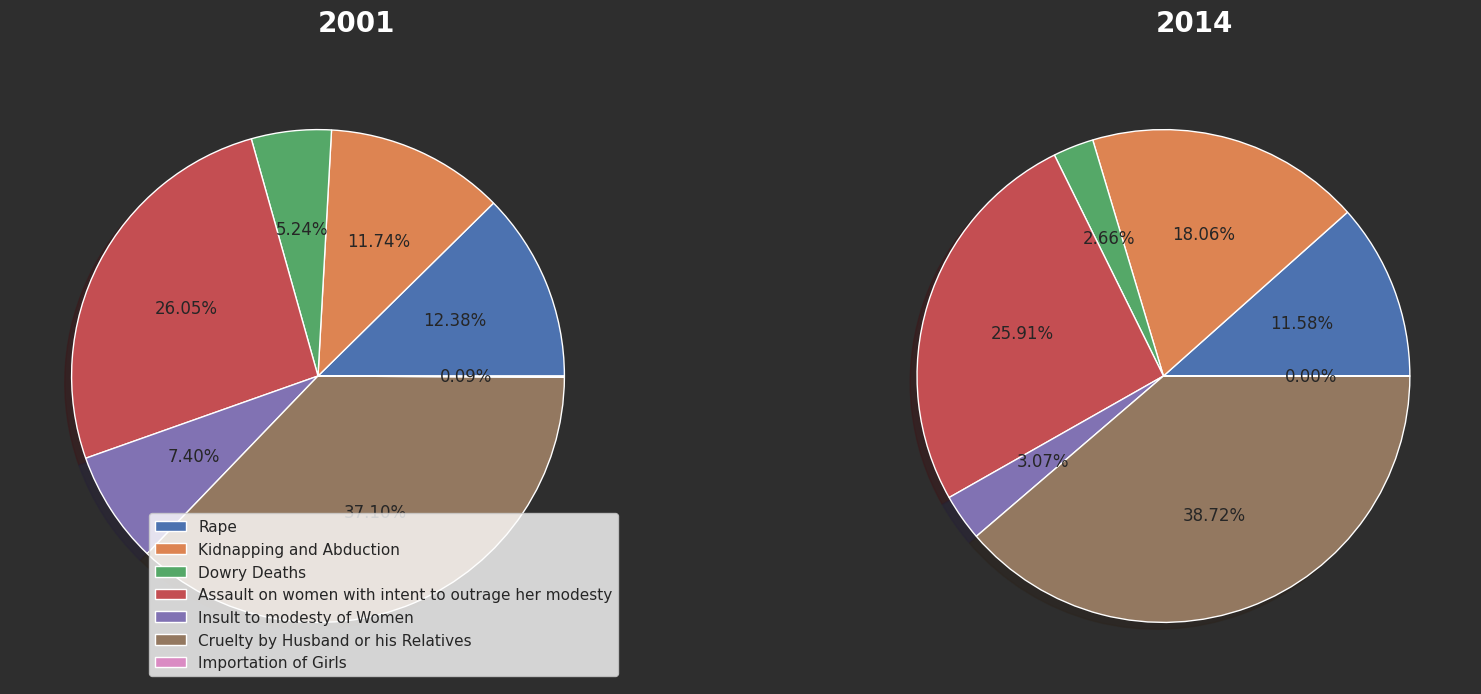

In [120]:
df_2001=df1.loc[df1.index==2001]
df_2014=df1.loc[df1.index==2014]

df_2001=df_2001.drop(["total_crimes"],axis=1)
df_2014=df_2014.drop(["total_crimes"],axis=1)
crimes_in_2001=list(df_2001.iloc[0])
crimes_in_2014=list(df_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#2E2E2E')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#2E2E2E')
    for text in texts:
        text.set_color('white')
    for autotext in autotexts:
        autotext.set_color('white')

ax[0].pie(crimes_in_2001,autopct='%1.2f%%',shadow=True)
ax[0].text(0,1.4,"2001",fontweight='bold',fontsize=20, color='white')
ax[1].pie(crimes_in_2014,autopct='%1.2f%%',shadow=True)
ax[0].text(3.4,1.4,"2014",fontweight='bold',fontsize=20, color='white')
ax[0].legend(labels=df_2001.columns,loc='best')

plt.show()

# **STATE BY STATE ANALYSIS**

In [121]:
states=df['STATE/UT'].unique()
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df_state=pd.DataFrame()
for i in crimes:
    df_state_crimes=df.groupby(['STATE/UT'])[i].sum()
    df_state[i]=df_state_crimes

print("Cateogry of crimes in each state from 2001 to 2014")
df_state=df_state.sort_values(by='total_crimes',ascending=False)
df_state.reset_index()


Cateogry of crimes in each state from 2001 to 2014


STATE/UT   Rape  Kidnapping and Abduction  Dowry Deaths  \
0       uttar pradesh  25575                     67953         28628   
1      andhra pradesh  16075                     17252          6922   
2         west bengal  23938                     30579          6154   
3           rajasthan  22842                     33139          5927   
4      madhya pradesh  45498                     17804         10545   
5         maharashtra  24487                     15184          4848   
6               assam  20095                     31037          1634   
7               delhi  16580                     38943          3461   
8              kerala  10015                      2226           350   
9             gujarat   5822                     17335           554   
10              bihar  15379                     28543         16103   
11             odisha  15240                     12794          5391   
12          karnataka   7528                      8131          3508   
13         tamil nadu   8330                     15454          2530   
14            haryana   8555                     10008          3686   
15       chhattisgarh  14654                      5904          1379   
16          jharkhand  11413                      7093          3948   
17             punjab   7328                      7548          1762   
18    jammu & kashmir   3519                     10582           147   
19            tripura   2530                      1101           376   
20        uttarakhand   1876                      3242           987   
21   himachal pradesh   2337                      2058            56   
22          telangana    979                       711           289   
23         chandigarh    385                       841            45   
24            manipur    534                      1303             3   
25          meghalaya   1321                       335            18   
26  arunachal pradesh    658                       735             3   
27            mizoram   1035                        15             4   
28                goa    531                       320            19   
29         puducherry    104                       153            28   
30      a & n islands    168                       106            10   
31             sikkim    285                        90             2   
32           nagaland    281                        95             1   
33       d & n haveli     66                       112             1   
34        daman & diu     30                        22             3   
35        lakshadweep     10                         1             0   

    Assault on women with intent to outrage her modesty  \
0                                               45606     
1                                               63476     
2                                               33454     
3                                               41681     
4                                               97739     
5                                               57352     
6                                               19128     
7                                               22905     
8                                               40219     
9                                               11593     
10                                               8479     
11                                              40107     
12                                              32875     
13                                              21702     
14                                               8571     
15                                              23548     
16                                               4949     
17                                               6205     
18                                              14319     
19                                               3672     
20                                               2183     
21                                               4

<ipython-input-122-4c5807c7076e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=df_state,x=df_state.index,y='total_crimes',palette='rocket')
<ipython-input-122-4c5807c7076e>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


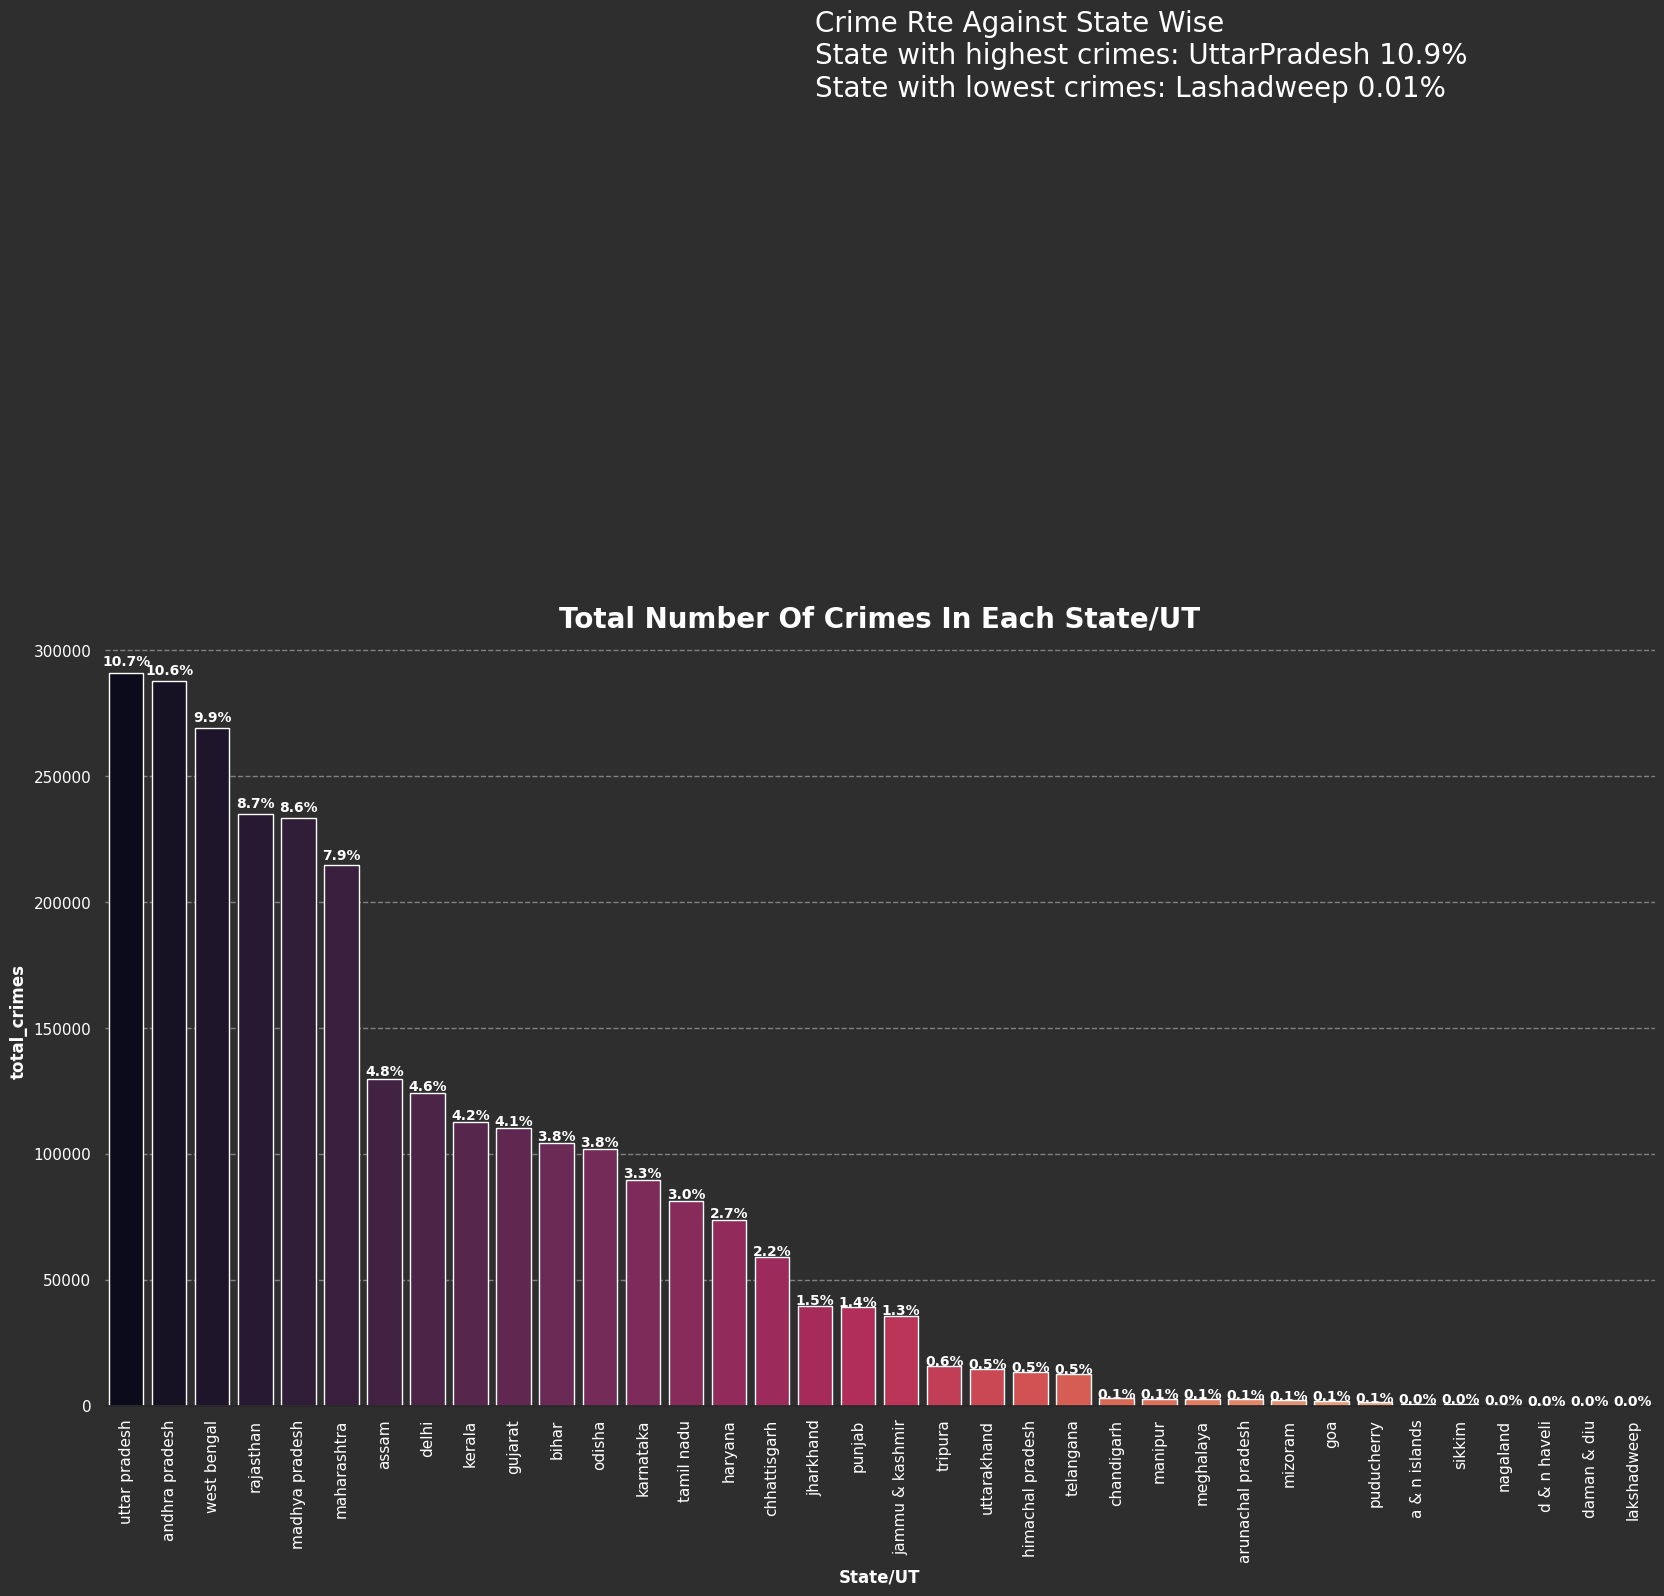

In [122]:
def without_hue_state(data,feature,ax):

    total=data['total_crimes'].sum()
    bars_plot=ax.patches

    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x,  y + 0.01 * y,percentage,ha='center',fontweight='bold',fontsize=10,color='white')
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(20,10))

ax=plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_state,x=df_state.index,y='total_crimes',palette='rocket')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(16,520000,"Crime Rte Against State Wise\nState with highest crimes: UttarPradesh 10.9%\nState with lowest crimes: Lashadweep 0.01%",fontsize=20,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel("State/UT",fontweight='bold',color='white')
plt.ylabel("total_crimes",fontweight='bold',color='white')
plt.title("Total Number Of Crimes In Each State/UT",fontweight='bold',fontsize=20,color='white')
without_hue_state(df_state,'total_crimes',a)
plt.show()

### **TOP 5 STATES/UT WITH HIGHEST CRIME RATES 2001 to 2014**
1. **Uttar Pradesh**
2. **Andhra Pradesh**
3. **West Bengal**
4. **Rajasthan**
5. **Madhya Pradesh**


In [123]:
df_state.head()

Rape  Kidnapping and Abduction  Dowry Deaths  \
STATE/UT                                                        
uttar pradesh   25575                     67953         28628   
andhra pradesh  16075                     17252          6922   
west bengal     23938                     30579          6154   
rajasthan       22842                     33139          5927   
madhya pradesh  45498                     17804         10545   

                Assault on women with intent to outrage her modesty  \
STATE/UT                                                              
uttar pradesh                                               45606     
andhra pradesh                                              63476     
west bengal                                                 33454     
rajasthan                                                   41681     
madhya pradesh                                              97739     

                Insult to modesty of Women  \
STATE/UT                                     
uttar pradesh                        26565   
andhra pradesh                       43482   
west bengal                           2674   
rajasthan                              397   
madhya pradesh                       10482   

                Cruelty by Husband or his Relatives  Importation of Girls  \
STATE/UT                                                                    
uttar pradesh                                 96869                     3   
andhra pradesh                               140453                    17   
west bengal                                  172062                   127   
rajasthan                                    131100                     7   
madhya pradesh                                51408                    67   

                total_crimes  
STATE/UT                      
uttar pradesh         291199  
andhra pradesh        287677  
west bengal           268988  
rajasthan             235093  
madhya pradesh        233543

### **FIVE STATES/UT WITH LEAST CRIME RATES 2001 to 2014**
1. **Sikkim**
2. **Nagaland**
3. **d&nhaveli**
4. **daman&diu**
5. **lakshadweep**

In [124]:
df_state.tail()

Rape  Kidnapping and Abduction  Dowry Deaths  \
STATE/UT                                                     
sikkim         285                        90             2   
nagaland       281                        95             1   
d & n haveli    66                       112             1   
daman & diu     30                        22             3   
lakshadweep     10                         1             0   

              Assault on women with intent to outrage her modesty  \
STATE/UT                                                            
sikkim                                                      293     
nagaland                                                    130     
d & n haveli                                                 53     
daman & diu                                                  20     
lakshadweep                                                   7     

              Insult to modesty of Women  Cruelty by Husband or his Relatives  \
STATE/UT                                                                        
sikkim                                17                                   54   
nagaland                              12                                   16   
d & n haveli                           6                                   45   
daman & diu                            2                                   38   
lakshadweep                            2                                    7   

              Importation of Girls  total_crimes  
STATE/UT                                          
sikkim                           0           741  
nagaland                         1           536  
d & n haveli                     0           283  
daman & diu                      0           115  
lakshadweep                      0            27

### **TOP FIVE STATES WITH HIGHEST NUMBER OF RAPE CRIME**

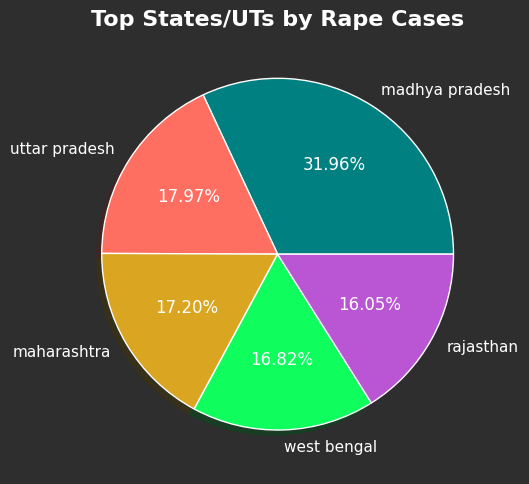

In [125]:
df_state_rape = df_state.sort_values(by="Rape", ascending=False)
df_highr = df_state_rape.iloc[:, 0:1].head()
df_highr.reset_index(inplace=True)

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    df_highr["Rape"],
    colors=colors,
    labels=df_highr['STATE/UT'],
    autopct='%1.2f%%',
    shadow=True
)

# Customize text colors
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

# Set plot title in white
plt.title("Top States/UTs by Rape Cases", fontweight='bold', fontsize=16, color='white')

plt.tight_layout()
plt.show()

### **TOP FIVE STATES WITH HIGHEST NUMBER OF ASSAULT ON WOMEN CRIME**

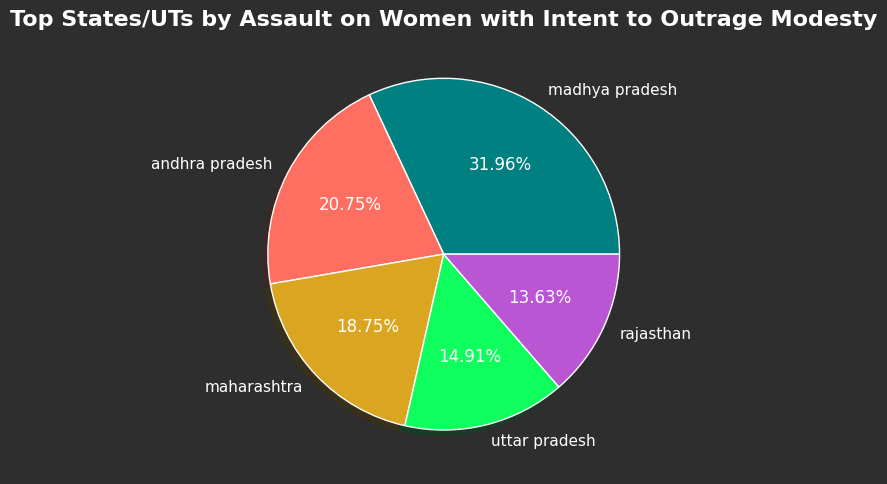

In [126]:
df_state_assault = df_state.sort_values(by='Assault on women with intent to outrage her modesty', ascending=False)
df_higha = df_state_assault.iloc[:, [3]].head()

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    df_higha['Assault on women with intent to outrage her modesty'],
    colors=colors,
    labels=df_higha.index,
    autopct='%1.2f%%',
    shadow=True
)

# Customize text colors
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

# Set plot title in white
plt.title("Top States/UTs by Assault on Women with Intent to Outrage Modesty", fontweight='bold', fontsize=16, color='white')

plt.tight_layout()
plt.show()

### **TOP FIVE STATES WITH HIGHEST NUMBER OF KIDNAPPING AND ABDUCTION CRIME**

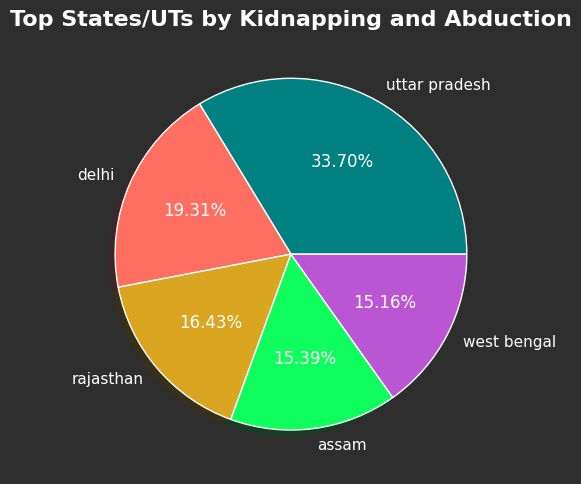

In [127]:
df_state_kidnapping = df_state.sort_values(by='Kidnapping and Abduction', ascending=False)
df_highk = df_state_kidnapping.iloc[:, [1]].head()

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    df_highk["Kidnapping and Abduction"],
    colors=colors,
    labels=df_highk.index,
    autopct='%1.2f%%',
    shadow=True
)

# Customize text colors
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

# Set plot title in white
plt.title("Top States/UTs by Kidnapping and Abduction", fontweight='bold', fontsize=16, color='white')

plt.tight_layout()
plt.show()

### **TOP FIVE STATES WITH HIGHEST NUMBER OF DOWRY DEATHS**

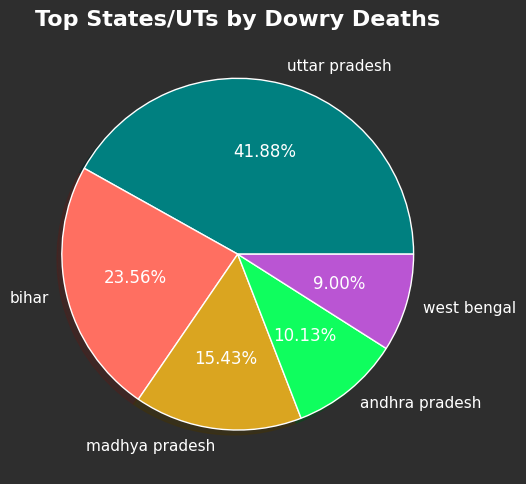

In [128]:
df_state_dowry_deaths = df_state.sort_values(by='Dowry Deaths', ascending=False)
df_highd = df_state_dowry_deaths.iloc[:, [2]].head()

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    df_highd["Dowry Deaths"],
    colors=colors,
    labels=df_highd.index,
    autopct='%1.2f%%',
    shadow=True
)

# Customize text colors
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

# Set plot title in white
plt.title("Top States/UTs by Dowry Deaths", fontweight='bold', fontsize=16, color='white')

plt.tight_layout()
plt.show()

### **TOP FIVE STATES WITH HIGHEST NUMBER OF INSULT TO MODESTY OF WOMEN**

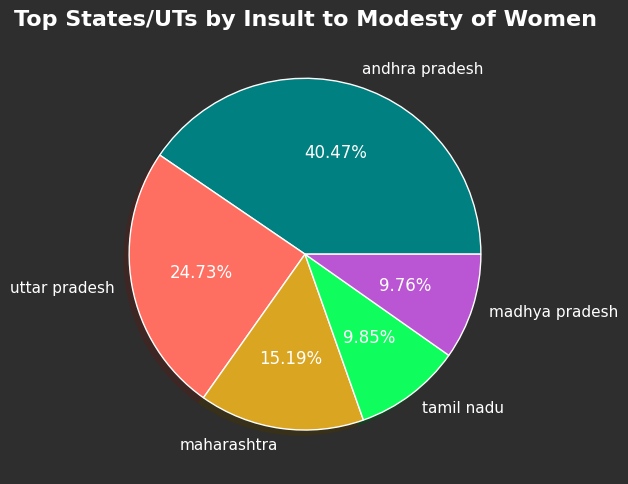

In [129]:
df_state_insult = df_state.sort_values(by='Insult to modesty of Women', ascending=False)
df_highi = df_state_insult.iloc[:, [4]].head()

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    df_highi['Insult to modesty of Women'],
    colors=colors,
    labels=df_highi.index,
    autopct='%1.2f%%',
    shadow=True
)

# Customize text colors
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

plt.title("Top States/UTs by Insult to Modesty of Women", fontweight='bold', fontsize=16, color='white')

plt.tight_layout()
plt.show()

### **TOP FIVE STATES WITH HIGHEST NUMBER OF CRUELTY BY HUSBAND CRIME**

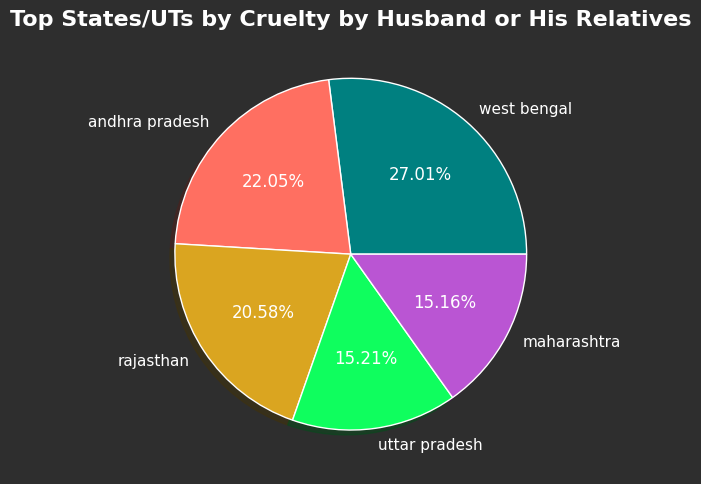

In [130]:
df_state_cruelty = df_state.sort_values(by='Cruelty by Husband or his Relatives', ascending=False)
df_highc = df_state_cruelty.iloc[:, [5]].head()

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    df_highc['Cruelty by Husband or his Relatives'],
    colors=colors,
    labels=df_highc.index,
    autopct='%1.2f%%',
    shadow=True
)

# Customize text colors
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

plt.title("Top States/UTs by Cruelty by Husband or His Relatives", fontweight='bold', fontsize=16, color='white')

plt.tight_layout()
plt.show()

### **TOP FIVE STATES WITH HIGHEST NUMBER OF IMPORTATION OF GIRLS CRIME**

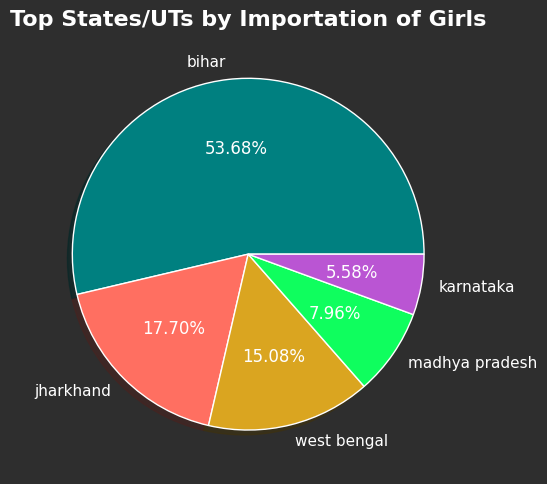

In [131]:
df_state_importation = df_state.sort_values(by='Importation of Girls', ascending=False)
df_highi = df_state_importation.iloc[:, [6]].head()

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    df_highi['Importation of Girls'],
    colors=colors,
    labels=df_highi.index,
    autopct='%1.2f%%',
    shadow=True
)

# Customize text colors
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

plt.title("Top States/UTs by Importation of Girls", fontweight='bold', fontsize=16, color='white')

plt.tight_layout()
plt.show()


### **We will examine top three states with highest crime rates**

### **Uttar Pradesh**

In [132]:
df_up=df_state.loc[df_state.index=='uttar pradesh']
df_up

Rape  Kidnapping and Abduction  Dowry Deaths  \
STATE/UT                                                       
uttar pradesh  25575                     67953         28628   

               Assault on women with intent to outrage her modesty  \
STATE/UT                                                             
uttar pradesh                                              45606     

               Insult to modesty of Women  \
STATE/UT                                    
uttar pradesh                       26565   

               Cruelty by Husband or his Relatives  Importation of Girls  \
STATE/UT                                                                   
uttar pradesh                                96869                     3   

               total_crimes  
STATE/UT                     
uttar pradesh        291199

In [133]:
crime_up = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
            'Assault on women with intent to outrage her modesty',
            'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
            'Importation of Girls']

# Create a DataFrame with the total counts of each crime
df_crime_up = pd.DataFrame({
    'Crimes in UP': crime_up,
    'total': [df_up[crime].sum() for crime in crime_up]
})

df_crime_up = df_crime_up.sort_values(by='total', ascending=False)

# Print the result
print("Total count of each crime from 2001 to 2014 in Uttar Pradesh")
print(df_crime_up)


Total count of each crime from 2001 to 2014 in Uttar Pradesh
                                        Crimes in UP  total
5                Cruelty by Husband or his Relatives  96869
1                           Kidnapping and Abduction  67953
3  Assault on women with intent to outrage her mo...  45606
2                                       Dowry Deaths  28628
4                         Insult to modesty of Women  26565
0                                               Rape  25575
6                               Importation of Girls      3


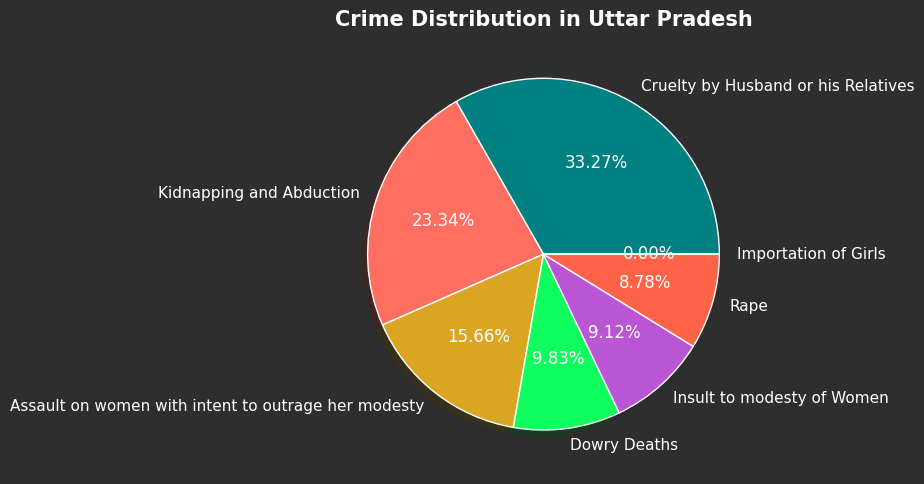

In [134]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    df_crime_up['total'],
    colors=colors,
    labels=df_crime_up['Crimes in UP'],
    autopct='%1.2f%%',
    shadow=True
)

# Customize text colors
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

# Set plot title in white
plt.title("Crime Distribution in Uttar Pradesh", fontweight='bold', fontsize=15, color='white')

plt.tight_layout()
plt.show()

<ipython-input-135-30f9fa3b20e8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(data=df_crime_up, x="Crimes in UP", y='total', palette='rocket_r')
<ipython-input-135-30f9fa3b20e8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


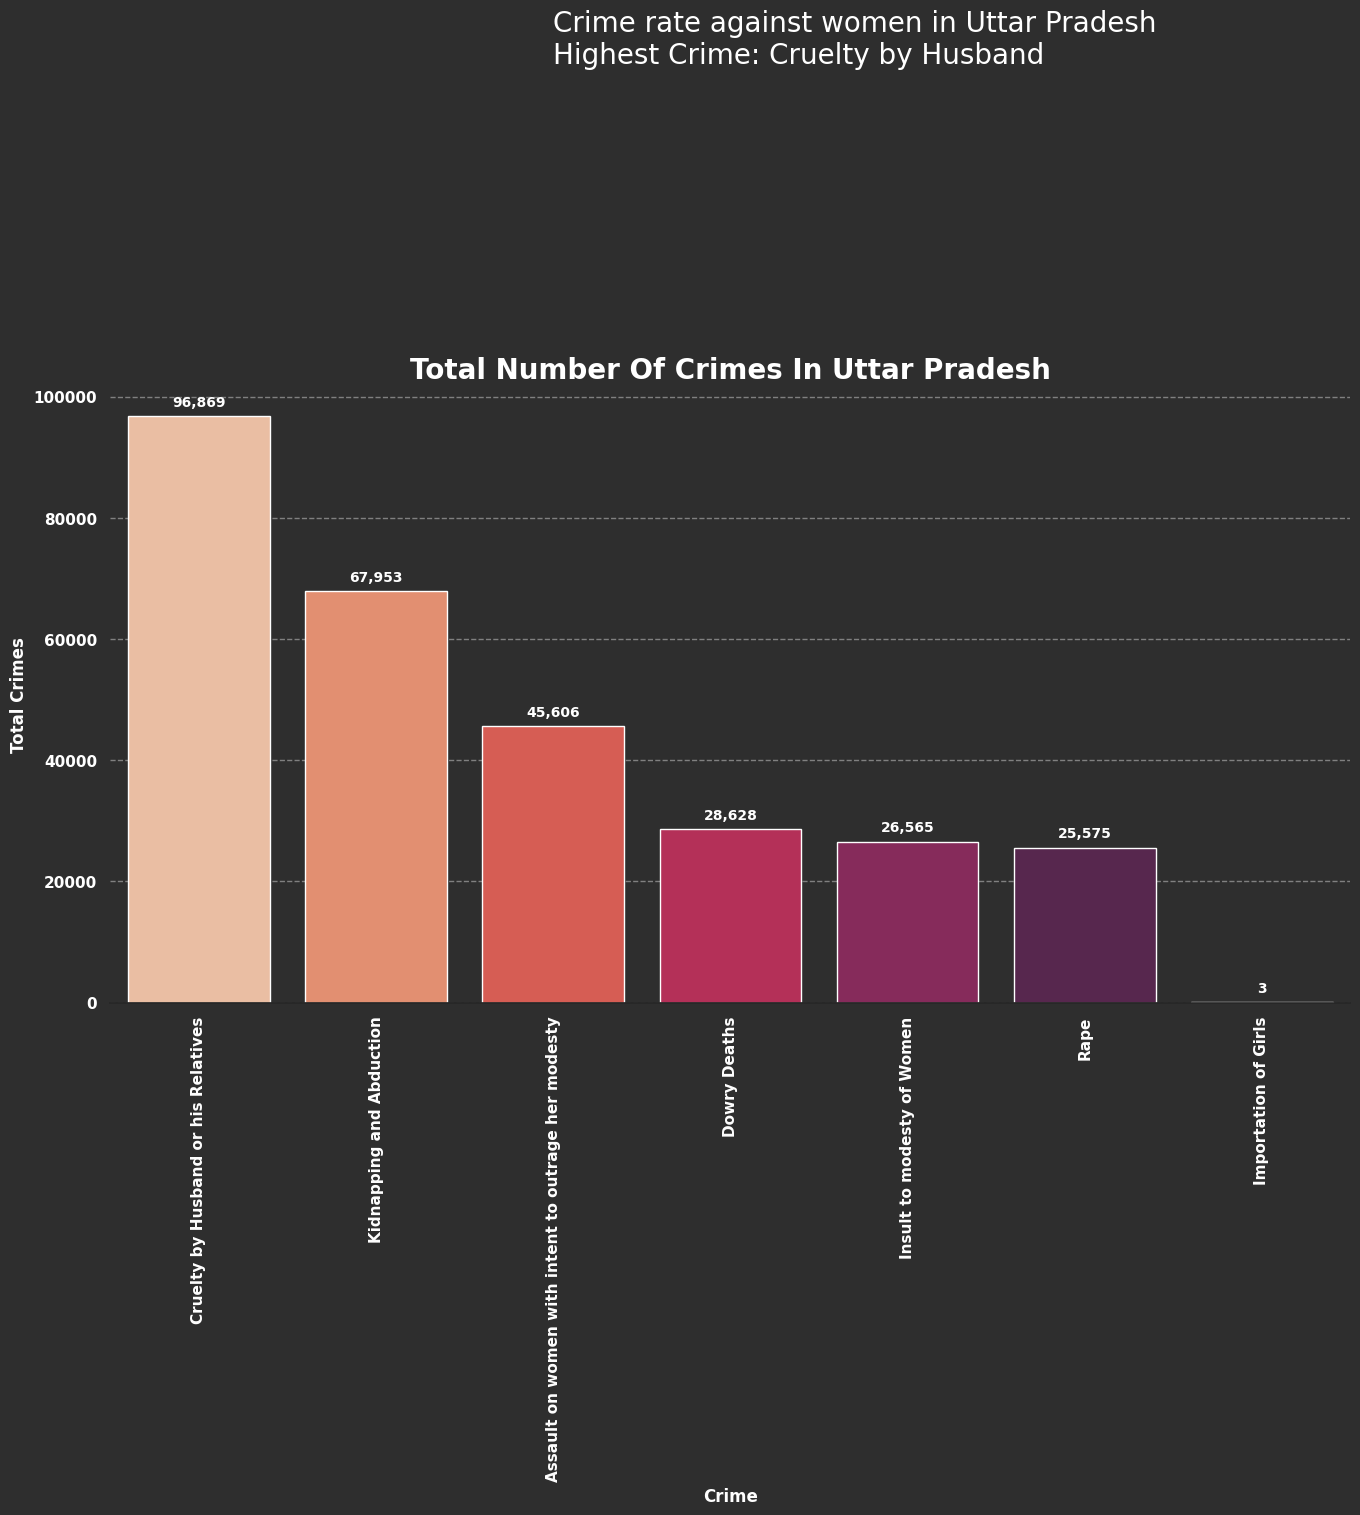

In [135]:
sns.set_theme(style='white', context='notebook')

fig = plt.figure(figsize=(16, 8))

ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--", axis="y", color='gray')

a = sns.barplot(data=df_crime_up, x="Crimes in UP", y='total', palette='rocket_r')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.text(2, 155000, "Crime rate against women in Uttar Pradesh\nHighest Crime: Cruelty by Husband",
         fontsize=20, color='white')

plt.xticks(fontweight='bold', color='white')
plt.yticks(fontweight='bold', color='white')
plt.xlabel("Crime", fontweight='bold', color='white')
plt.ylabel("Total Crimes", fontweight='bold', color='white')
plt.title("Total Number Of Crimes In Uttar Pradesh", fontweight='bold', fontsize=20, color='white')
# Add bar values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 5),  # Adjust vertical offset
                textcoords='offset points',
                color='white', fontsize=10, fontweight='bold')

plt.show()

In [136]:
crime_up=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df_up_year=df.loc[df['STATE/UT']=='uttar pradesh']

df1_up_yearwise=pd.DataFrame()
for i in crime_up:
    df_crimes_up=df_up_year.groupby(['Year'])[i].sum()
    df1_up_yearwise[i]=df_crimes_up

print("Total number of crimes in Uttar Pradesh year wise from 2001 to 2014")
print()
df1_up_yearwise=df1_up_yearwise.sort_values(by='total_crimes',ascending=False)
df1_up_yearwise

Total number of crimes in Uttar Pradesh year wise from 2001 to 2014



Rape  Kidnapping and Abduction  Dowry Deaths  \
Year                                                 
2014  3467                     10626          2469   
2013  3050                      9737          2335   
2008  1871                      4439          2237   
2012  1963                      7910          2244   
2009  1759                      5078          2232   
2011  2042                      7525          2322   
2007  1648                      3363          2076   
2010  1563                      5468          2217   
2001  1958                      2879          2211   
2006  1314                      2551          1798   
2002  1415                      2298          1893   
2004  1397                      2324          1708   
2005  1217                      2256          1564   
2003   911                      1499          1322   

      Assault on women with intent to outrage her modesty  \
Year                                                        
2014                                               8605     
2013                                               7303     
2008                                               2955     
2012                                               3247     
2009                                               2782     
2011                                               3455     
2007                                               2522     
2010                                               2793     
2001                                               2870     
2006                                               2096     
2002                                               2145     
2004                                               1900     
2005                                               1835     
2003                                               1098     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
Year                                                                    
2014                          29                                10471   
2013                          25                                 8781   
2008                        3374                                 8312   
2012                           8                                 7661   
2009                        2524                                 8566   
2011                           3                                 7121   
2007                        2882                                 7650   
2010                          11                                 7978   
2001                        2575                                 7365   
2006                        2714                                 5204   
2002                        1887                                 5679   
2004                        2682                                 4950   
2005                        2881                                 4505   
2003                        4970                                 2626   

      Importation of Girls  total_crimes  
Year                                      
2014                     0         35667  
2013                     0         31231  
2008                     0         23188  
2012                     0         23033  
2009                     0         22941  
2011                     0         22468  
2007                     0         20141  
2010                     0         20030  
2001                     0         19858  
2006                     0         15677  
2002                     0         15317  
2004                     3         14964  
2005                     0         14258  
2003                     0         12426

<ipython-input-137-1b263321a1fb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(data=df1_up_yearwise, x=df1_up_yearwise.index, y='total_crimes', palette='rocket_r')
<ipython-input-137-1b263321a1fb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


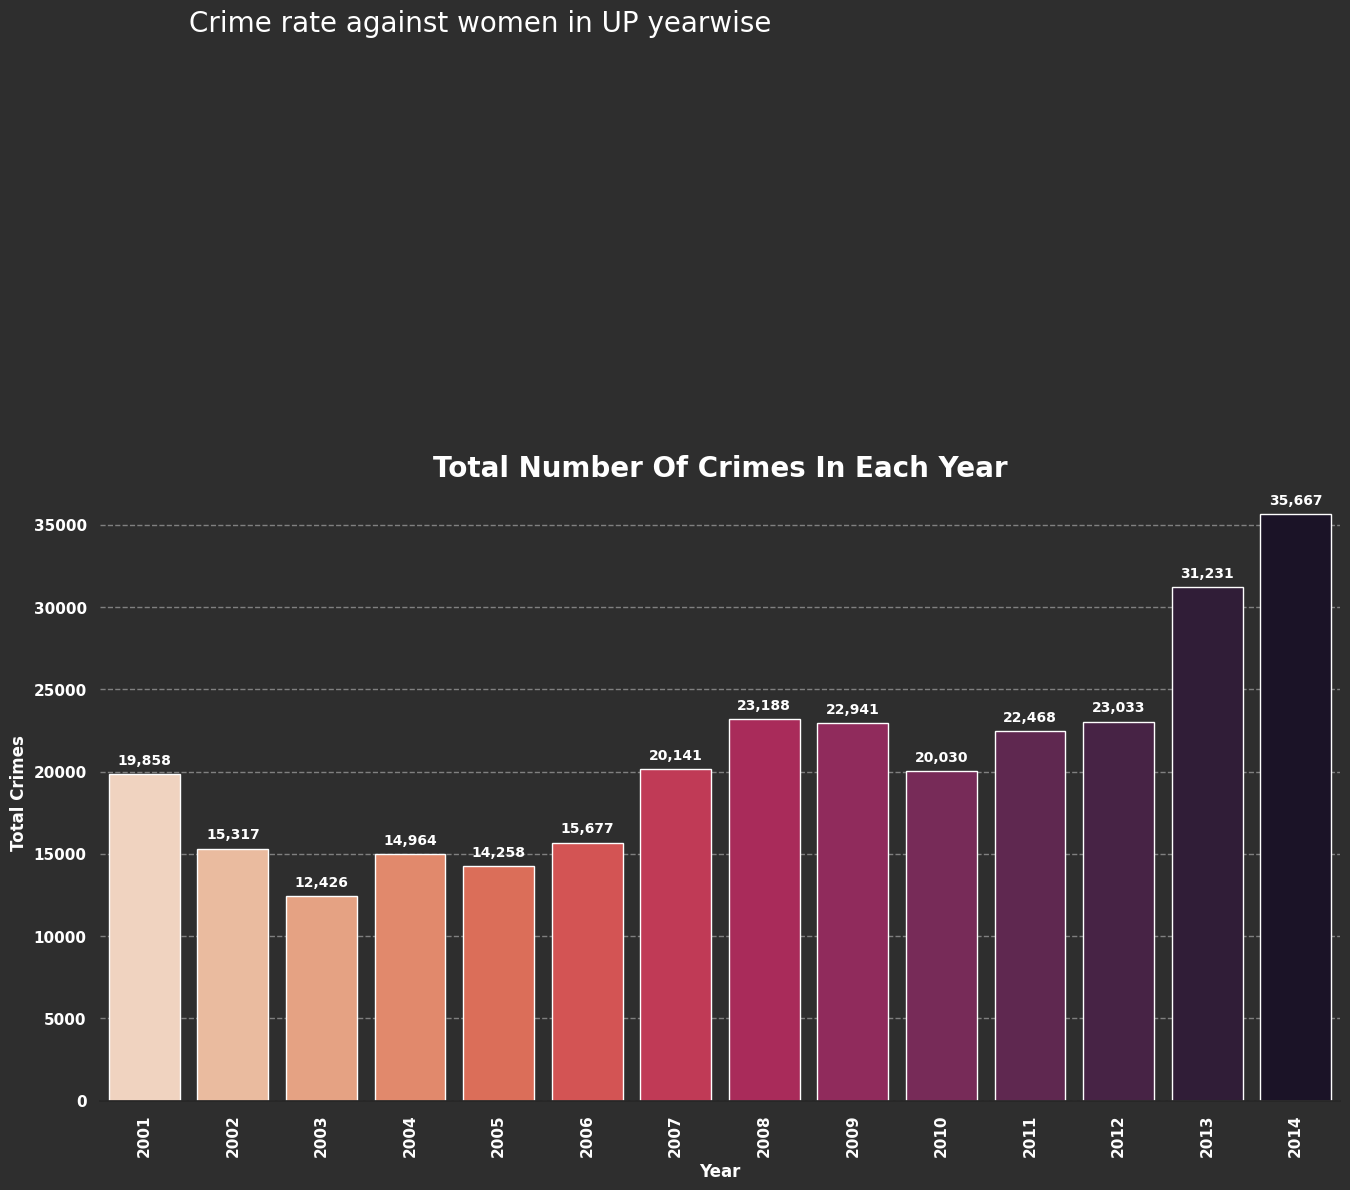

In [137]:
sns.set_theme(style='white', context='notebook')

fig = plt.figure(figsize=(16, 8))

ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--", axis="y", color='gray')

a = sns.barplot(data=df1_up_yearwise, x=df1_up_yearwise.index, y='total_crimes', palette='rocket_r')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.text(0.5, 65000, "Crime rate against women in UP yearwise",
         fontsize=20, color='white')

plt.xticks(fontweight='bold', color='white')
plt.yticks(fontweight='bold', color='white')
plt.xlabel("Year", fontweight='bold', color='white')
plt.ylabel("Total Crimes", fontweight='bold', color='white')
plt.title("Total Number Of Crimes In Each Year", fontweight='bold', fontsize=20, color='white')

# Add bar values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 5),  # Vertical offset
                textcoords='offset points',
                color='white', fontsize=10, fontweight='bold')

plt.show()


<ipython-input-138-f1f30f56bc23>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontweight='bold', color='white')


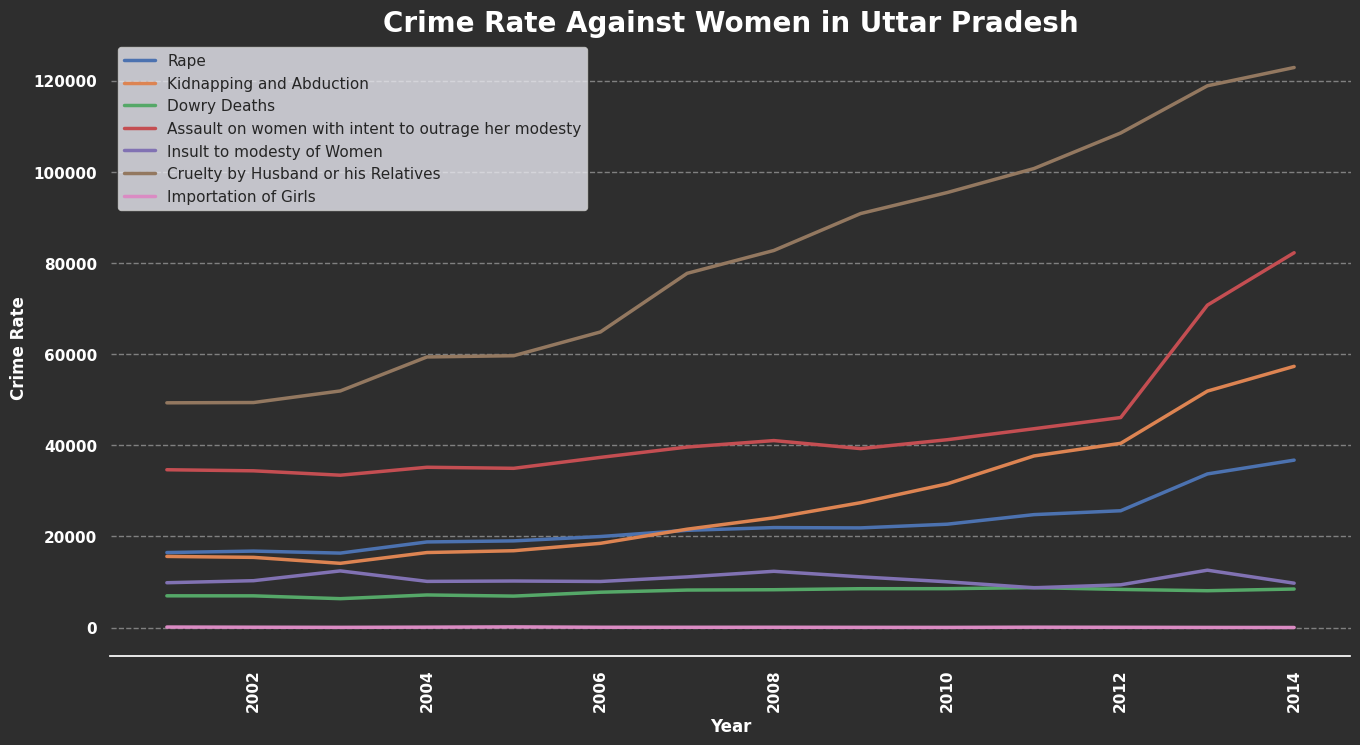

In [138]:
sns.set_theme(style='dark', context='notebook')

fig = plt.figure(figsize=(16, 8))

ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Remove unwanted spines and grid setup
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--", axis="y", color='gray')

# Define year range
lower_year = 2001
upper_year = 2014
years = np.arange(lower_year, upper_year + 1)

for crime in crimes[:-1]:
    a = sns.lineplot(x='Year',y=crime,data=df1, label=crime, linewidth=2.5, linestyle='solid')

# Set tick labels, colors, and rotations
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontweight='bold', color='white')
plt.xticks(fontweight='bold', color='white')
plt.yticks(fontweight='bold', color='white')

# Set axis labels and title
plt.xlabel("Year", fontweight='bold', color='white')
plt.ylabel("Crime Rate", fontweight='bold', color='white')
plt.title("Crime Rate Against Women in Uttar Pradesh", fontweight='bold', fontsize=20, color='white')

# Show plot
plt.show()

### **2001 VS 2014 In UP**

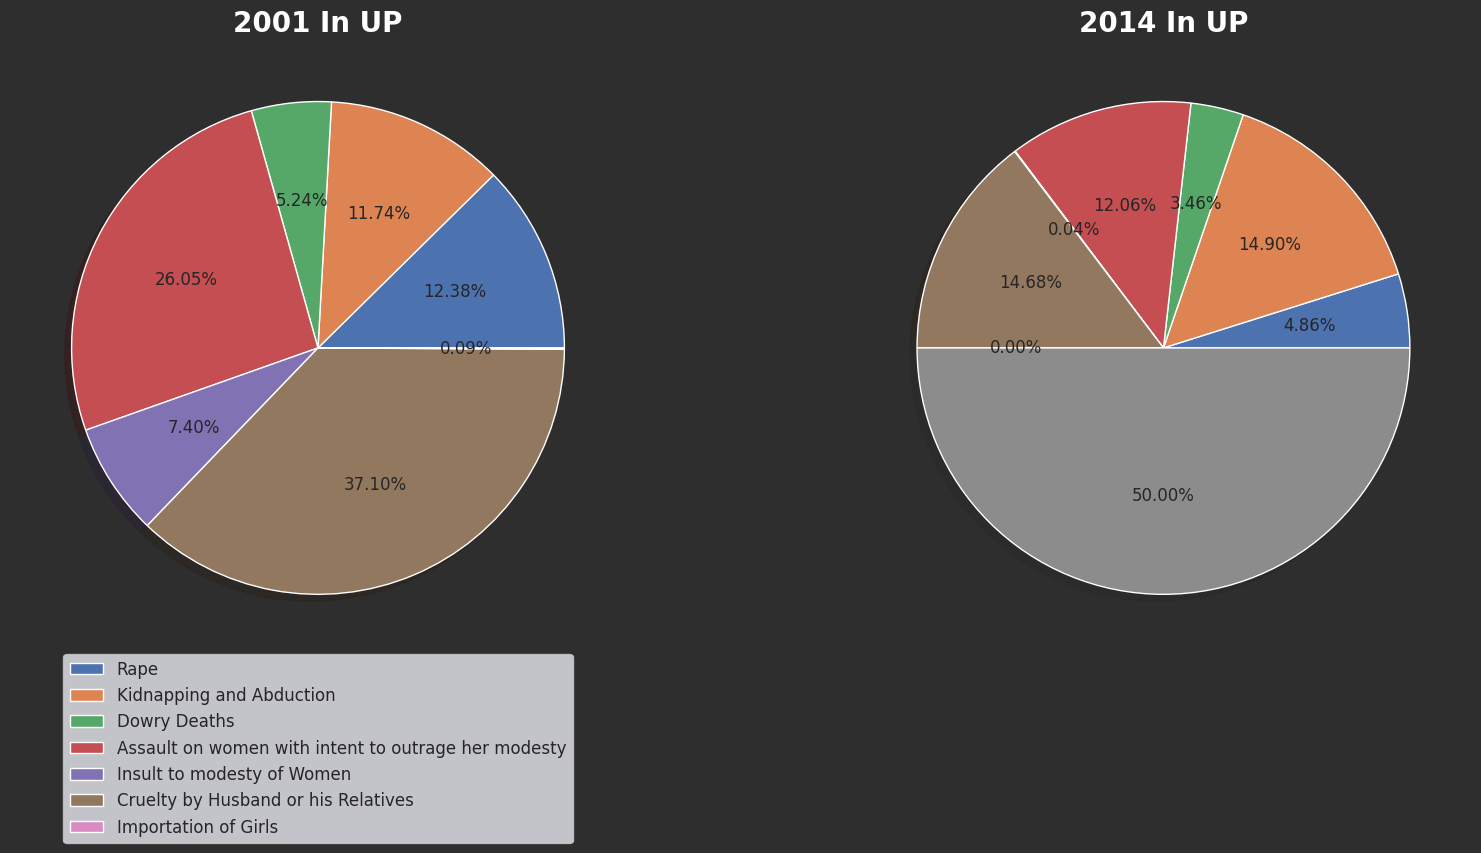

In [139]:
f_2001 = df1_up_yearwise.loc[df1_up_yearwise.index == 2001]
df_2014 = df1_up_yearwise.loc[df1_up_yearwise.index == 2014]

# df_2001 = df_2001.drop(["total_crimes"], axis=1)
# df_2014 = df_2014.drop(["total_crimes"], axis=1)
crimes_in_2001 = list(df_2001.iloc[0])
crimes_in_2014 = list(df_2014.iloc[0])

f, ax = plt.subplots(1, 2, figsize=(20, 8))
f.patch.set_facecolor('#2E2E2E')

for j in range(0, 2):
    ax[j].set_facecolor('#2E2E2E')

# Plotting the pie charts
ax[0].pie(crimes_in_2001, autopct='%1.2f%%', shadow=True)
ax[0].set_title("2001 In UP", fontweight='bold', fontsize=20, color='white')

ax[1].pie(crimes_in_2014, autopct='%1.2f%%', shadow=True)
ax[1].set_title("2014 In UP", fontweight='bold', fontsize=20, color='white')

# Adding legend to the first pie chart
ax[0].legend(labels=df_2001.columns, loc='center', bbox_to_anchor=(0.5, -0.15), fontsize=12)

plt.show()

### **ANDHRA PRADESH**

In [140]:
# Extract data for Andhra Pradesh
df_ap = df_state.loc[df_state.index == 'andhra pradesh']

crime_ap = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls'
]

df_crime_ap = df_ap[crime_ap].sum().reset_index()
df_crime_ap.columns = ['Crimes in AP', 'total']

# Sort by total in descending order
df_crime_ap = df_crime_ap.sort_values(by='total', ascending=False)

print("Total count of each crime from 2001 to 2014 in Andhra Pradesh")
df_crime_ap


Total count of each crime from 2001 to 2014 in Andhra Pradesh


Crimes in AP   total
5                Cruelty by Husband or his Relatives  140453
3  Assault on women with intent to outrage her mo...   63476
4                         Insult to modesty of Women   43482
1                           Kidnapping and Abduction   17252
0                                               Rape   16075
2                                       Dowry Deaths    6922
6                               Importation of Girls      17

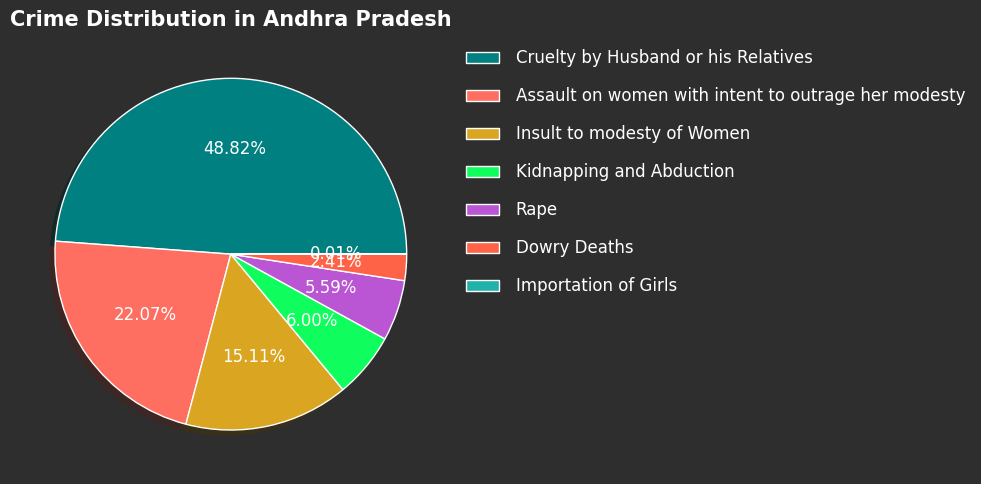

In [141]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Plot pie chart without labels (we will use a legend instead)
wedges, texts, autotexts = plt.pie(
    df_crime_ap['total'],
    colors=colors,
    autopct='%1.2f%%',
    shadow=True,
    labels=None  # Remove labels from pie chart
)

# Customize text colors
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

# Add legend
plt.legend(
    wedges,
    df_crime_ap['Crimes in AP'],
    loc='upper left',
    bbox_to_anchor=(1, 1),
    fontsize=12,
    title_fontsize='13',
    frameon=False,
    labelspacing=1.2,
    handletextpad=1,
    edgecolor='white',
    facecolor='#2E2E2E',  # Legend background color
    labelcolor='white'  # Text color
)

# Set plot title in white
plt.title("Crime Distribution in Andhra Pradesh", fontweight='bold', fontsize=15, color='white')

plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-142-98910020cf58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=df_crime_ap,x="Crimes in AP",y='total',palette='rocket_r')
<ipython-input-142-98910020cf58>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


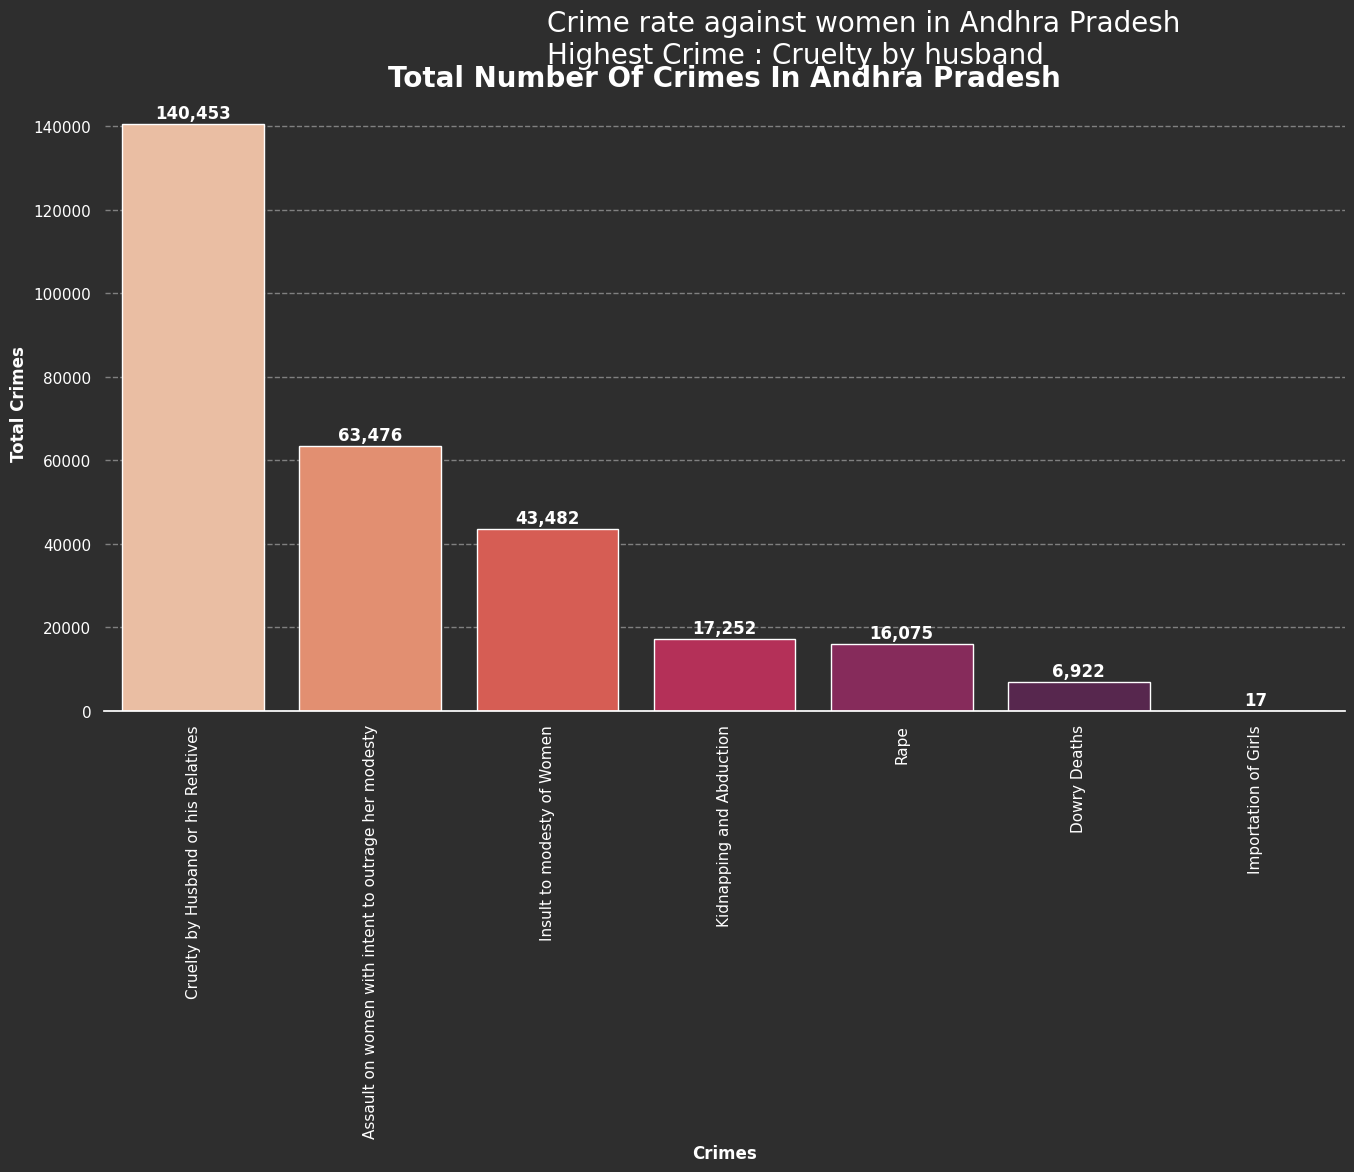

In [142]:
sns.set_theme(style='dark',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_crime_ap,x="Crimes in AP",y='total',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(2,155000,"Crime rate against women in Andhra Pradesh\nHighest Crime : Cruelty by husband",color='white',fontsize=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel("Crimes",fontweight='bold',color='white')
plt.ylabel("Total Crimes",fontweight='bold',color='white')
plt.title("Total Number Of Crimes In Andhra Pradesh",fontweight='bold',fontsize=20,color='white')

for p in ax.patches:
    value = int(p.get_height())
    ax.annotate(f'{value:,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 8),
                textcoords='offset points',
                color='white', fontweight='bold')

plt.show()

In [143]:
crime_ap=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df_ap_year=df.loc[df['STATE/UT']=='andhra pradesh']

df1_ap_yearwise=pd.DataFrame()
for i in crime_ap:
    df_crimes_ap=df_ap_year.groupby(['Year'])[i].sum()
    df1_ap_yearwise[i]=df_crimes_ap

print("Total number of crimes from in Andhra Pradesh year wise 2001 to 2014")
df1_ap_yearwise=df1_ap_yearwise.sort_values(by='total_crimes',ascending=False)
df1_ap_yearwise

Total number of crimes from in Andhra Pradesh year wise 2001 to 2014


Rape  Kidnapping and Abduction  Dowry Deaths  \
Year                                                 
2013  1635                      1595           492   
2011  1442                      1612           599   
2012  1341                      1403           504   
2010  1362                      1531           588   
2009  1188                      1526           546   
2007  1070                      1564           613   
2008  1257                      1396           556   
2006  1049                      1329           519   
2005   935                       995           443   
2004  1016                      1030           512   
2003   946                       931           466   
2014   961                       721           215   
2002  1002                       854           449   
2001   871                       765           420   

      Assault on women with intent to outrage her modesty  \
Year                                                        
2013                                               6930     
2011                                               4849     
2012                                               4816     
2010                                               4634     
2009                                               5147     
2007                                               4406     
2008                                               4730     
2006                                               4534     
2005                                               3595     
2004                                               3817     
2003                                               4128     
2014                                               4547     
2002                                               3799     
2001                                               3544     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
Year                                                                    
2013                        4702                                15084   
2011                        3658                                13376   
2012                        3714                                13389   
2010                        4562                                12080   
2009                        3520                                11297   
2007                        3316                                11335   
2008                        3551                                10306   
2006                        2411                                 9164   
2005                        2508                                 8696   
2004                        2310                                 8388   
2003                        2286                                 8167   
2014                        2649                                 6362   
2002                        2024                                 7018   
2001                        2271                                 5791   

      Importation of Girls  total_crimes  
Year                                      
2013                     0         30438  
2011                     0         25536  
2012                     0         25167  
2010                     0         24757  
2009                     0         23224  
2007                     0         22304  
2008                     0         21796  
2006                     0         19006  
2005                     3         17175  
2004                     2         17075  
2003                     5         16929  
2014                     0         15455  
2002                     0         15146  
2001                     7         13669

<ipython-input-144-b822403b3590>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=df1_ap_yearwise,x=df1_ap_yearwise.index,y='total_crimes',palette='rocket_r')
<ipython-input-144-b822403b3590>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


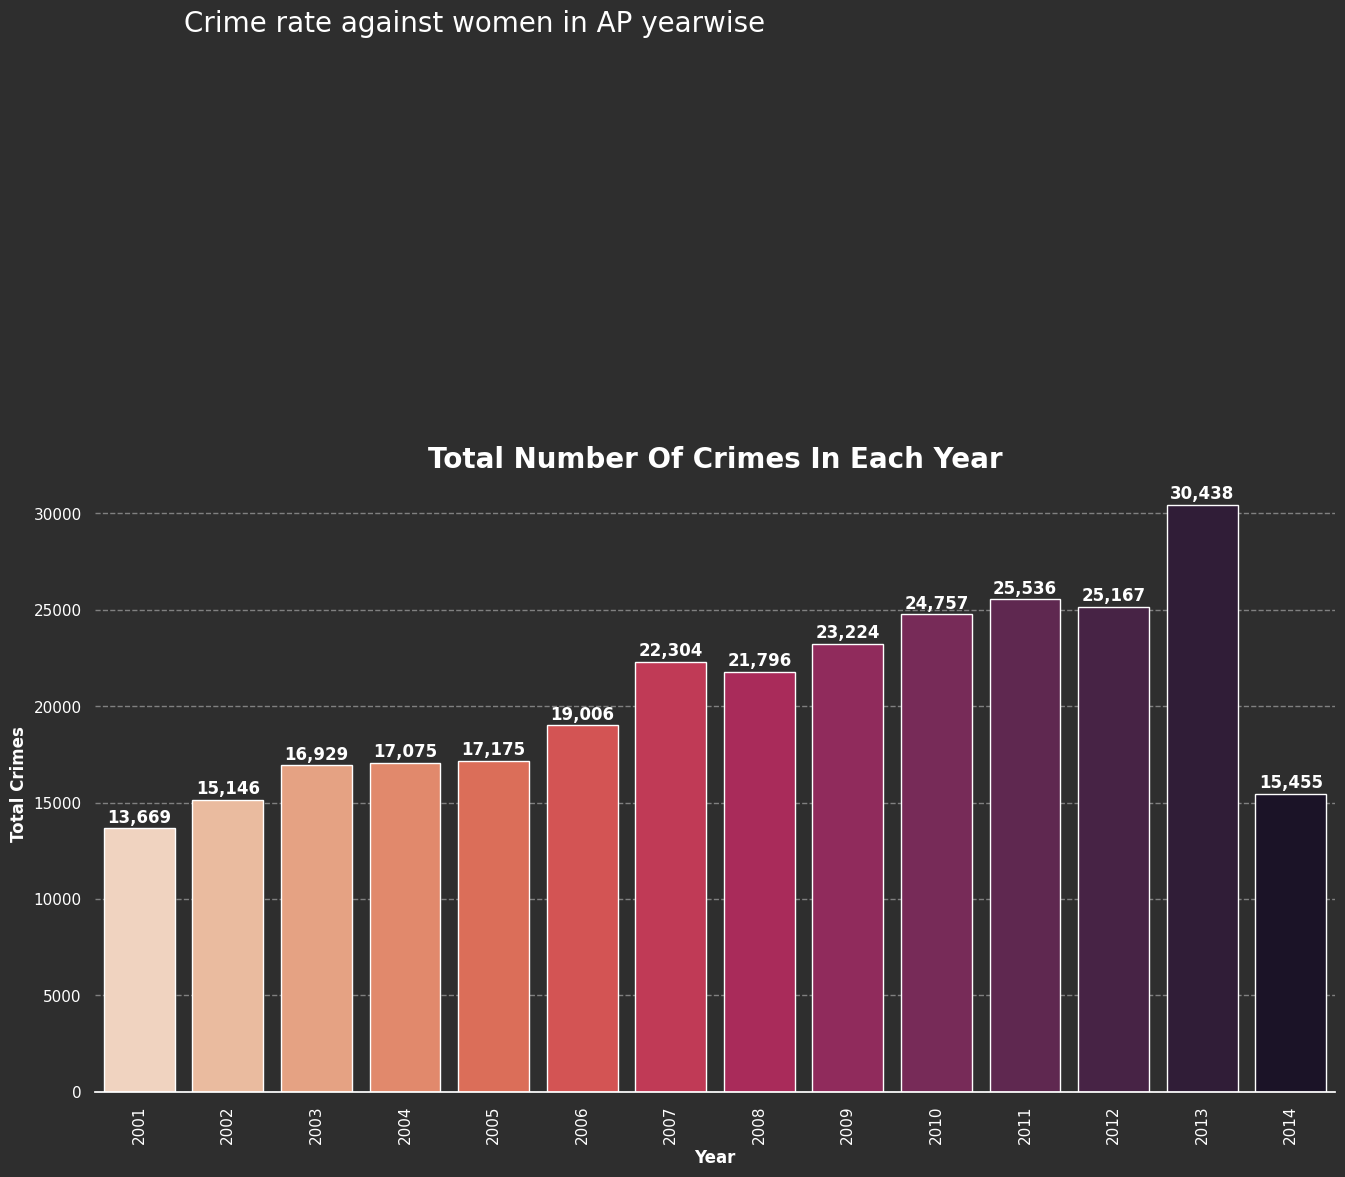

In [144]:
fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df1_ap_yearwise,x=df1_ap_yearwise.index,y='total_crimes',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(0.5,55000,"Crime rate against women in AP yearwise",color='white',fontsize=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel("Year",fontweight='bold',color='white')
plt.ylabel("Total Crimes",fontweight='bold',color='white')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20,color='white')

for p in ax.patches:
    value = int(p.get_height())  # Get the height of the bar
    ax.annotate(f'{value:,}',  # Add comma formatting for large numbers
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text at the center of the bar
                ha='center', va='center',
                xytext=(0, 8),  # Slightly above the bar
                textcoords='offset points',
                color='white', fontweight='bold')

plt.show()

<ipython-input-145-e858ba726115>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, color='white')


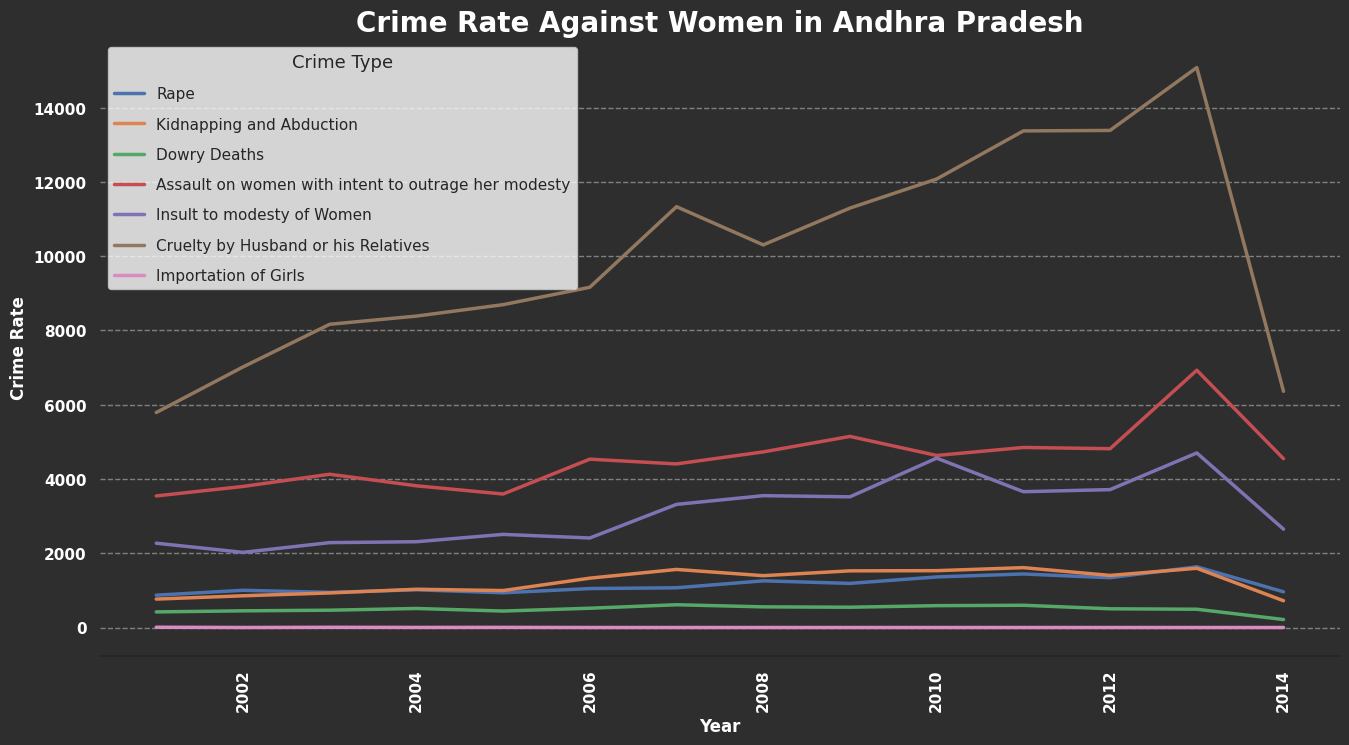

In [145]:
sns.set_theme(style='white', context='notebook')

fig = plt.figure(figsize=(16, 8))

ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Remove unwanted spines
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--", axis="y", color='gray')

for crime in crimes[:-1]:
    a = sns.lineplot(data=df1_ap_yearwise,x='Year',y=crime, label=crime, linewidth=2.5)

# Rotating x-tick labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, color='white')

plt.legend(title='Crime Type', title_fontsize='13',fontsize='11',loc='upper left',frameon=True,labelspacing=1)
plt.xticks(fontweight='bold', color='white')
plt.yticks(fontweight='bold', color='white')
plt.xlabel("Year", fontweight='bold', color='white')
plt.ylabel("Crime Rate", fontweight='bold', color='white')
plt.title("Crime Rate Against Women in Andhra Pradesh", fontweight='bold', fontsize=20, color='white')

# Show the plot
plt.show()

### **2001 VS 2014 IN ANDHRA PRADESH**

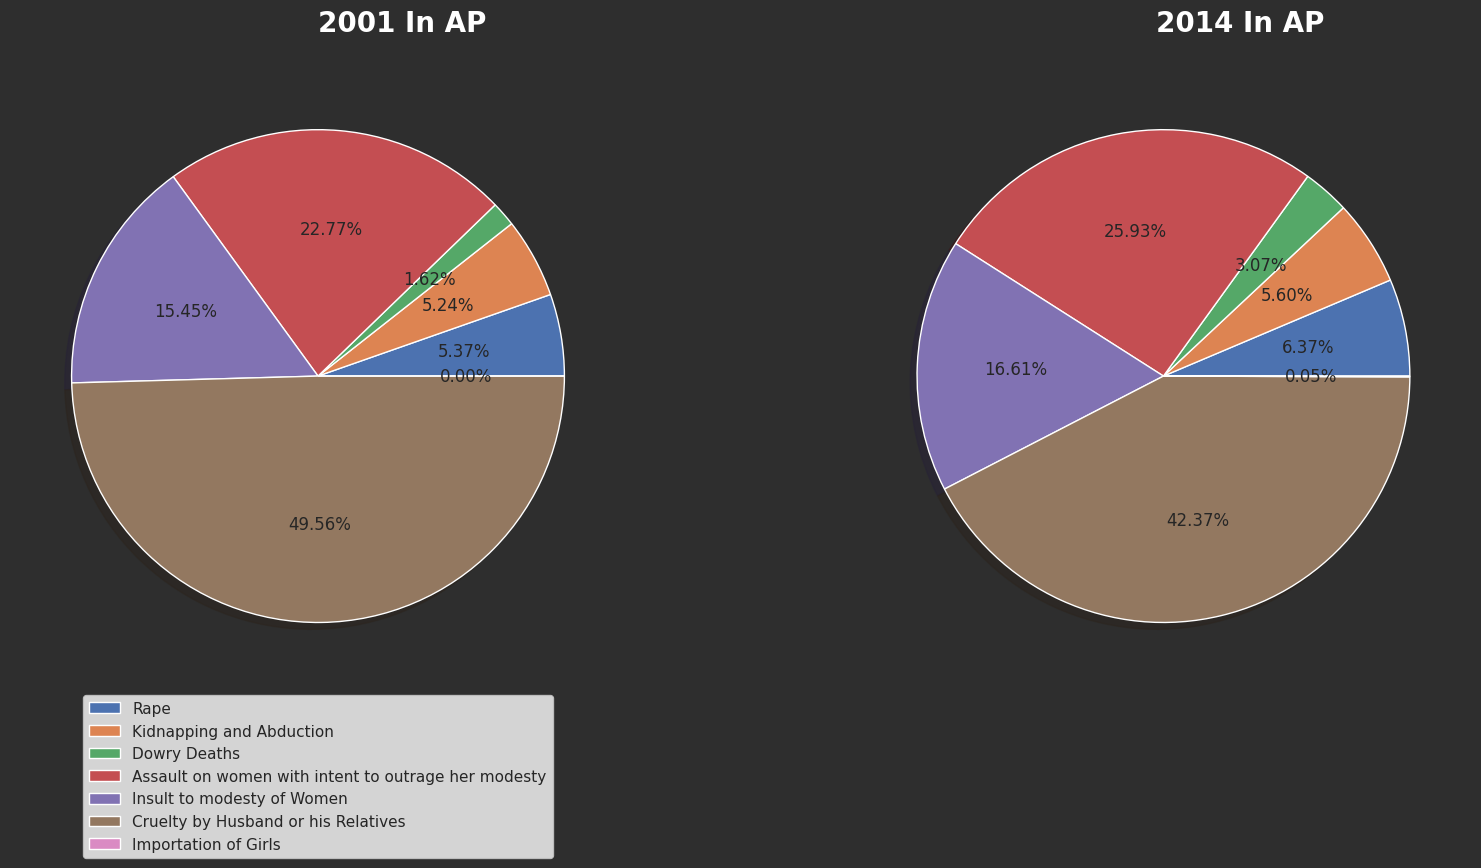

In [146]:
df_2001=df1_ap_yearwise.loc[df1.index==2001]
df_2014=df1_ap_yearwise.loc[df1.index==2014]

df_2001=df_2001.drop(["total_crimes"],axis=1)
df_2014=df_2014.drop(["total_crimes"],axis=1)
crimes_in_2001=list(df_2001.iloc[0])
crimes_in_2014=list(df_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#2E2E2E')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#2E2E2E')

ax[0].pie(crimes_in_2001,autopct='%1.2f%%',shadow=True)
ax[0].text(0,1.4,"2001 In AP",fontweight='bold',fontsize=20,color='white')
ax[1].pie(crimes_in_2014,autopct='%1.2f%%',shadow=True)
ax[0].text(3.4,1.4,"2014 In AP",fontweight='bold',fontsize=20,color='white')
ax[0].legend(labels=df_2001.columns,loc='center', bbox_to_anchor=(0.5, -0.15))

plt.show()

### **WEST BENGAL**

In [147]:
df_ap = df_state.loc[df_state.index == 'west bengal']

# List of crimes to include
crime_wb = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls'
]

# Aggregate and prepare the data in one step
df_crime_wb = df_ap[crime_wb].sum().reset_index()
df_crime_wb.columns = ['Crimes in WB', 'total']
df_crime_wb = df_crime_wb.sort_values(by='total', ascending=False).reset_index(drop=True)

# Display the result
print("Total count of each crime from 2001 to 2014 in West Bengal\n")
print(df_crime_wb)

Total count of each crime from 2001 to 2014 in West Bengal

                                        Crimes in WB   total
0                Cruelty by Husband or his Relatives  172062
1  Assault on women with intent to outrage her mo...   33454
2                           Kidnapping and Abduction   30579
3                                               Rape   23938
4                                       Dowry Deaths    6154
5                         Insult to modesty of Women    2674
6                               Importation of Girls     127


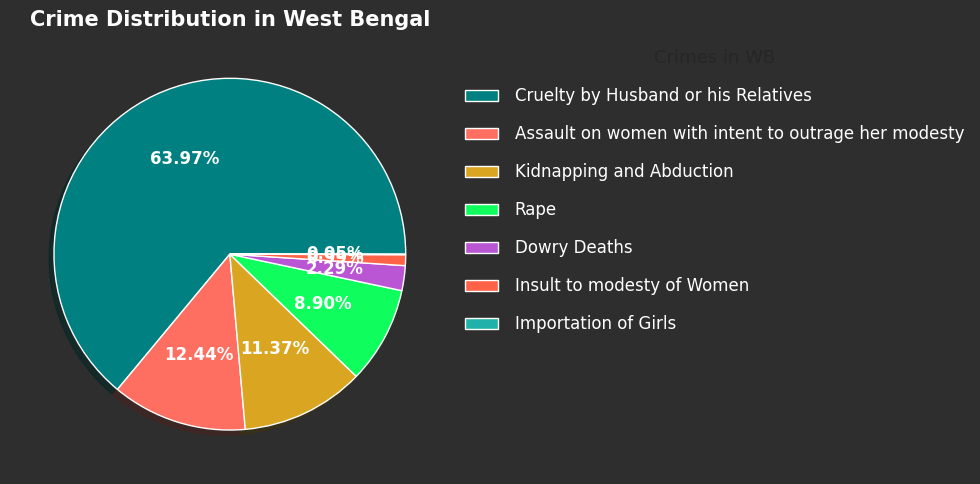

In [148]:
fig = plt.figure(figsize=(20, 5))

ax = plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

# Plotting the pie chart without labels
wedges, texts, autotexts = plt.pie(
    df_crime_wb['total'],
    colors=colors,
    autopct='%1.2f%%',
    shadow=True,
    textprops={'color': 'white', 'fontweight': 'bold'},
    labels=None
)

# Add legend
plt.legend(
    wedges,
    df_crime_wb['Crimes in WB'],
    loc='upper left',
    bbox_to_anchor=(1, 1),
    fontsize=12,
    title="Crimes in WB",
    title_fontsize='13',
    frameon=False,
    labelspacing=1.2,
    handletextpad=1,
    edgecolor='white',
    facecolor='#2E2E2E',  # Legend background color
    labelcolor='white'
)

plt.title("Crime Distribution in West Bengal", fontweight='bold', fontsize=15, color='white')

plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-149-edd9bf677c9b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=df_crime_wb,x="Crimes in WB",y='total',palette='rocket_r')
<ipython-input-149-edd9bf677c9b>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


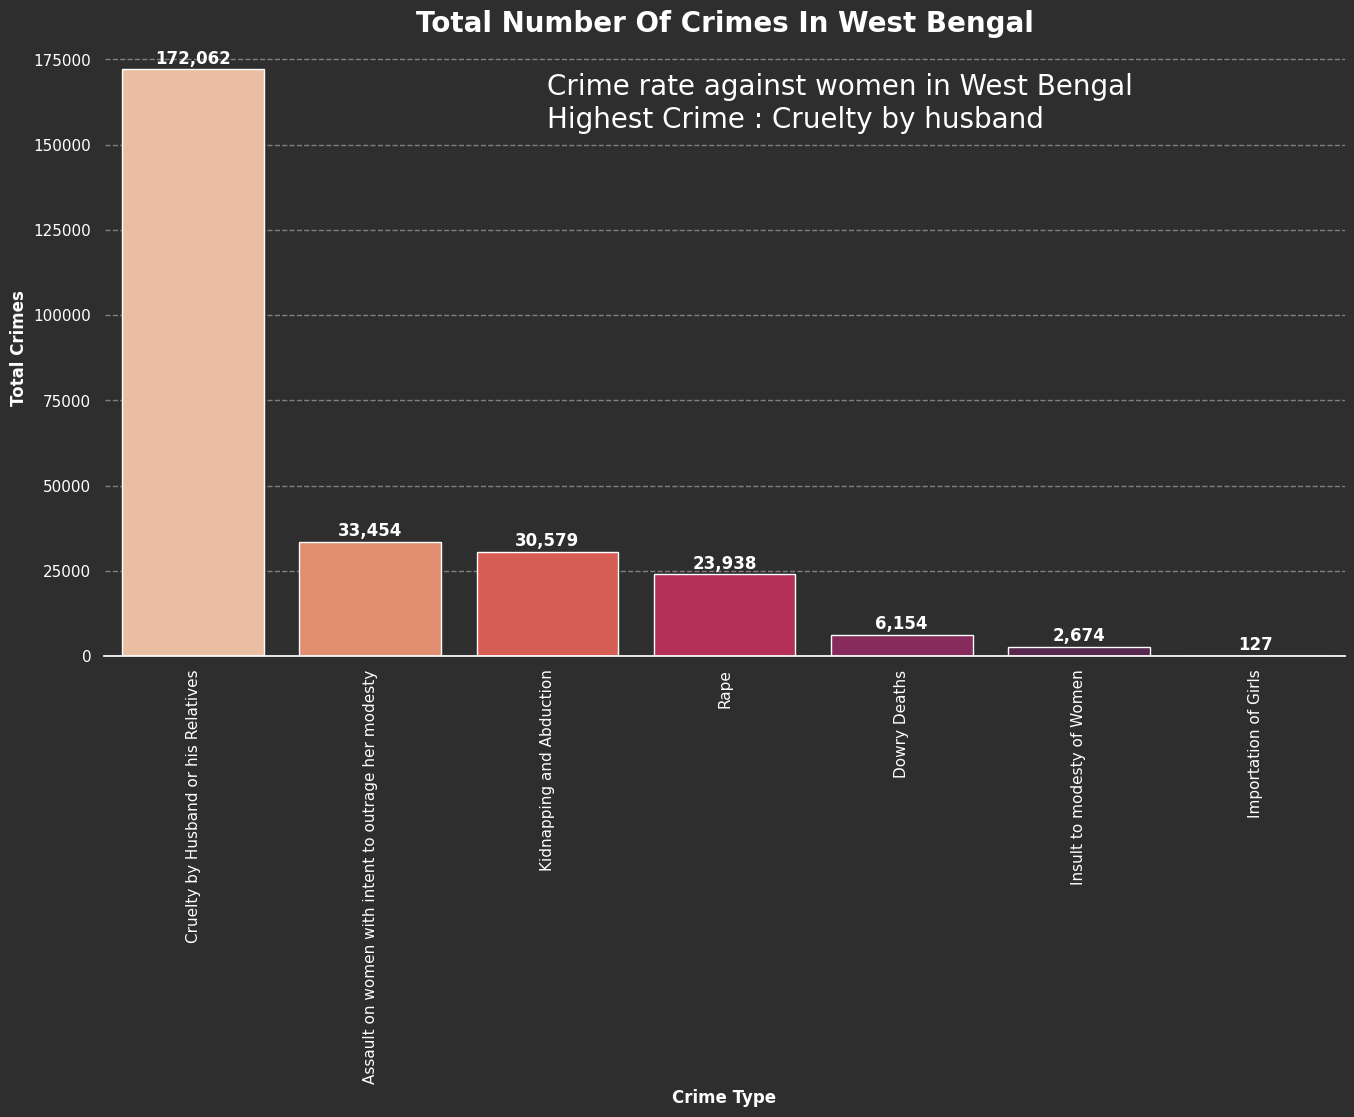

In [149]:
sns.set_theme(style='dark',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_crime_wb,x="Crimes in WB",y='total',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(2,155000,"Crime rate against women in West Bengal\nHighest Crime : Cruelty by husband",fontsize=20,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel("Crime Type",fontweight='bold',color='white')
plt.ylabel("Total Crimes",fontweight='bold',color='white')
plt.title("Total Number Of Crimes In West Bengal",fontweight='bold',fontsize=20,color='white')

for p in ax.patches:
    value = int(p.get_height())  # Get the height of the bar
    ax.annotate(f'{value:,}',  # Add comma formatting for large numbers
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text at the center of the bar
                ha='center', va='center',
                xytext=(0, 8),  # Slightly above the bar
                textcoords='offset points',
                color='white', fontweight='bold')

plt.show()

Total number of crimes from in West Bengal year wise 2001 to 2014



<ipython-input-150-64741a14596c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=df1_wb_yearwise,x=df1_wb_yearwise.index,y='total_crimes',palette='rocket_r')
<ipython-input-150-64741a14596c>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


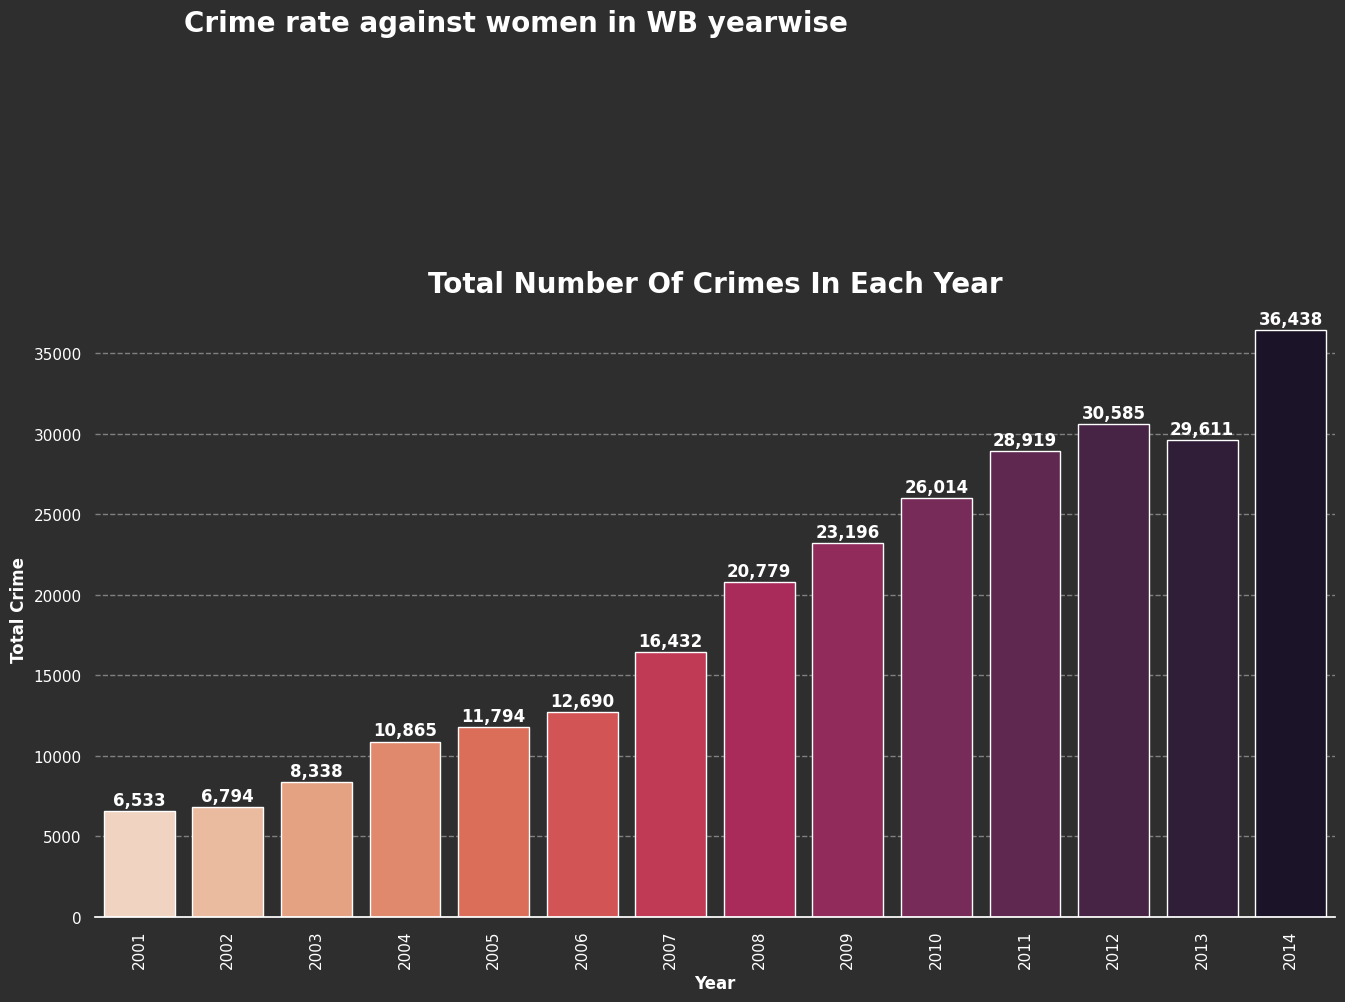

In [150]:
crime_wb=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df_wb_year=df.loc[df['STATE/UT']=='west bengal']

df1_wb_yearwise=pd.DataFrame()
for i in crime_wb:
    df_crimes_wb=df_wb_year.groupby(['Year'])[i].sum()
    df1_wb_yearwise[i]=df_crimes_wb

print("Total number of crimes from in West Bengal year wise 2001 to 2014")
print()
df1_wb_yearwise=df1_wb_yearwise.sort_values(by='total_crimes',ascending=False)
#df1_wb_yearwise
fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df1_wb_yearwise,x=df1_wb_yearwise.index,y='total_crimes',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(0.5,55000,"Crime rate against women in WB yearwise",fontweight='bold',fontsize=20,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel("Year",fontweight='bold',color='white')
plt.ylabel("Total Crime",fontweight='bold',color='white')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20,color='white')

for p in ax.patches:
    value = int(p.get_height())  # Get the height of the bar
    ax.annotate(f'{value:,}',  # Add comma formatting for large numbers
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text at the center of the bar
                ha='center', va='center',
                xytext=(0, 8),  # Slightly above the bar
                textcoords='offset points',
                color='white', fontweight='bold')

plt.show()

<ipython-input-151-cdafb71abeab>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


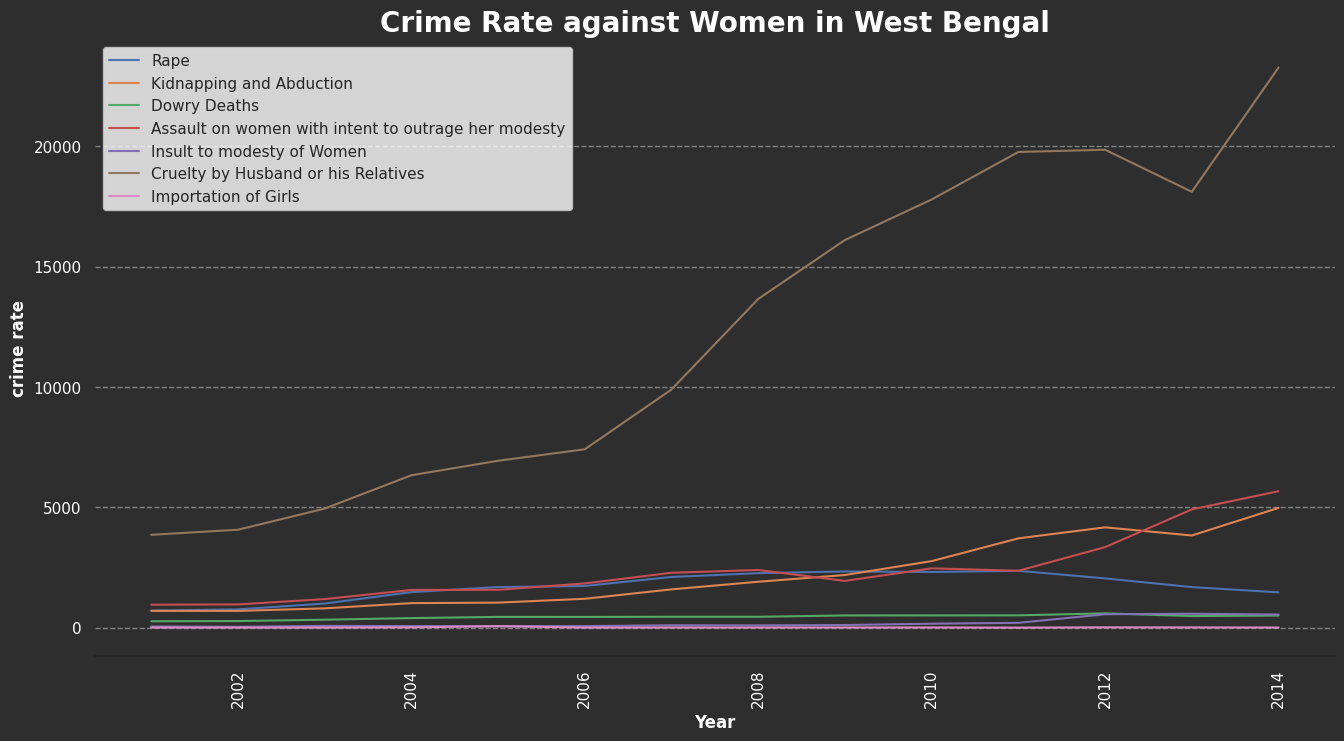

In [151]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#2E2E2E")
fig.patch.set_facecolor("#2E2E2E")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

for crime in crimes[:-1]:
    a=sns.lineplot(data=df1_wb_yearwise,x='Year',y=crime,ax=ax,label=crime)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel("Year",fontweight='bold',color='white')
plt.ylabel("crime rate",fontweight='bold',color='white')
plt.title("Crime Rate against Women in West Bengal",fontweight='bold',fontsize=20,color='white')
plt.show()

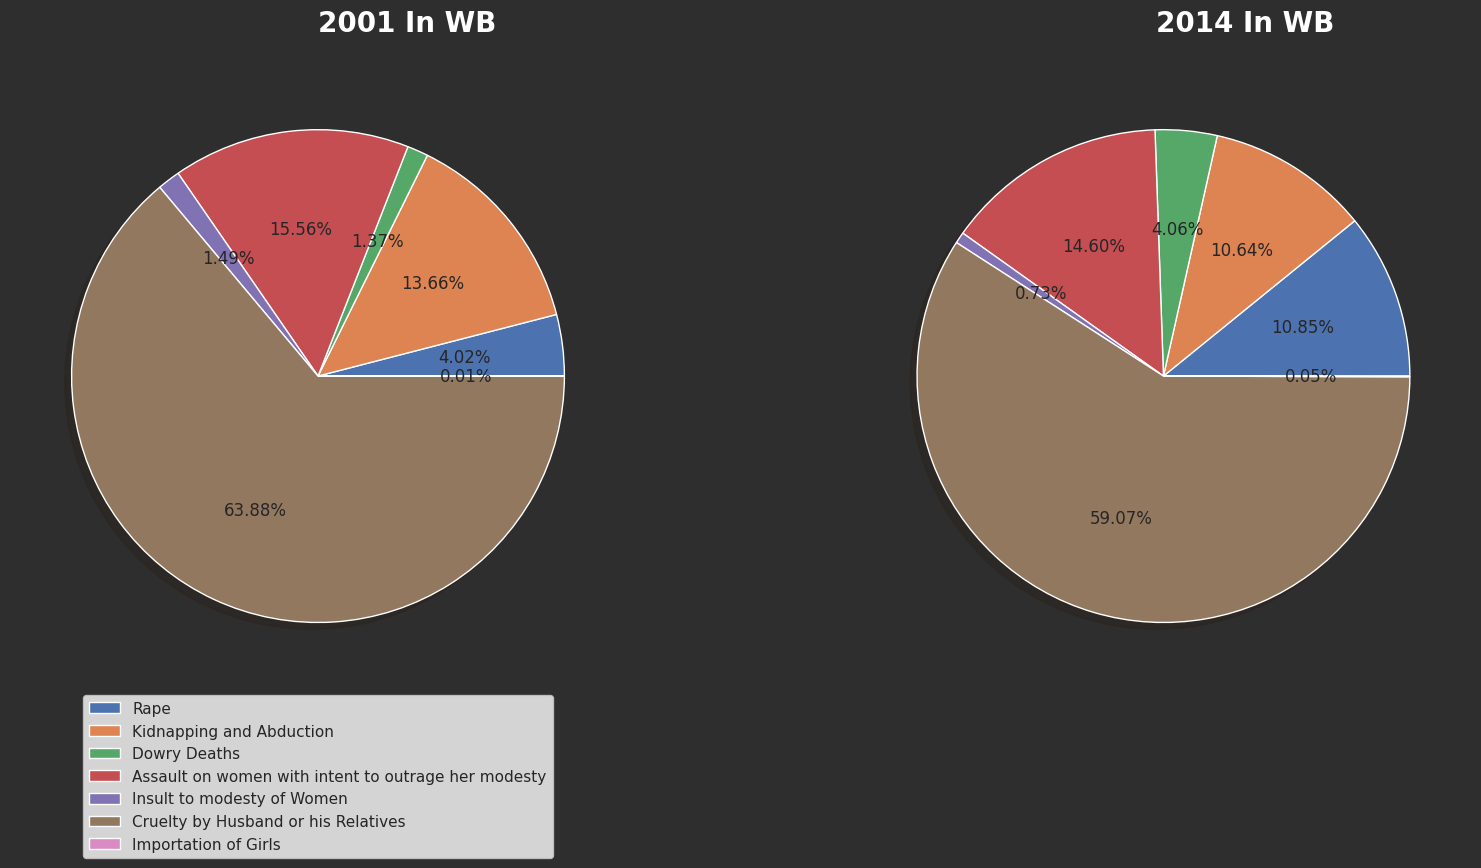

In [152]:
df_2001=df1_wb_yearwise.loc[df1.index==2001]
df_2014=df1_wb_yearwise.loc[df1.index==2014]

df_2001=df_2001.drop(["total_crimes"],axis=1)
df_2014=df_2014.drop(["total_crimes"],axis=1)
crimes_in_2001=list(df_2001.iloc[0])
crimes_in_2014=list(df_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#2E2E2E')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#2E2E2E')

ax[0].pie(crimes_in_2001,autopct='%1.2f%%',shadow=True)
ax[0].text(0,1.4,"2001 In WB",fontweight='bold',fontsize=20,color='white')
ax[1].pie(crimes_in_2014,autopct='%1.2f%%',shadow=True)
ax[0].text(3.4,1.4,"2014 In WB",fontweight='bold',fontsize=20,color='white')
ax[0].legend(labels=df_2001.columns,loc='center', bbox_to_anchor=(0.5, -0.15))

plt.show()